In [1]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

colors = [
    "#7494d3",
    "#5cb545",
    "#9956c6",
    "#a7b338",
    "#6a6bc6",
    "#d09e40",
    "#ce62bb",
    "#56be85",
    "#d1477d",
    "#397f4d",
    "#cf4b4a",
    "#40bbc1",
    "#d8662c",
    "#99af66",
    "#b76989",
    "#6d7127",
    "#b6744a"
]

time: 1.37 s (started: 2024-01-11 15:16:53 +01:00)


In [2]:
# %texify --code-font-family Monaco --linespread 1.2 --code-font-size 13

time: 530 µs (started: 2024-01-11 15:16:54 +01:00)


In [3]:
df_homophily = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/homophily_datasets_new_with_metrics.csv")

time: 8.53 ms (started: 2024-01-11 15:16:54 +01:00)


In [4]:
df_similarity = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/similarity_datasets.csv")

time: 8.6 ms (started: 2024-01-11 15:16:54 +01:00)


In [5]:
df_all = df_homophily.merge(df_similarity)
# df_all = df_homophily
# removed_columns = ['acm', 'twitch_ru', 'twitch_de'] # datasets where beta could not be inferred (too low or too large)
# df_all = df_all[~df_all['dataset'].isin(removed_columns)]
df_all

dataset    H_node    H_edge         C         l         r          k  \
0       citeseer  0.714119  0.736369  0.171070  9.310487  0.007137   3.476777   
1           cora  0.814498  0.804103  0.237636  6.310999 -0.071365   4.079678   
2           film  0.221966  0.219460  0.080193  4.110280 -0.046871   7.040000   
3           dblp  0.734636  0.744707  0.638952  3.476752  0.308222  31.442815   
4           imdb  0.462170  0.446323  0.526589  3.700298  0.468194  19.455390   
5   amazon_photo  0.848826  0.827205  0.410459  4.050997 -0.045047  31.799920   
6        cornell  0.118240  0.132143  0.167080  3.200564 -0.246913   3.060109   
7      wisconsin  0.170690  0.206009  0.207679  3.259952 -0.190340   3.713147   
8          texas  0.087281  0.111864  0.197926  3.036210 -0.264722   3.224044   
9         lastfm  0.833171  0.873876  0.219418  5.232237  0.017073   7.294334   
10   twitch_ptbr  0.594905  0.570849  0.319895  2.532379 -0.232462  32.739540   
11     twitch_fr  0.573869  0.559450  0.221706  2.680991 -0.178151  34.407085   
12     twitch_es  0.618602  0.579991  0.222496  2.883191 -0.189051  25.551635   
13   twitch_engb  0.545217  0.555996  0.130928  3.677616 -0.121908   9.914117   

    similarity  
0     0.636876  
1     0.685451  
2     0.387369  
3     0.630028  
4     0.490794  
5     0.752339  
6     0.365983  
7     0.393578  
8     0.355870  
9     0.714815  
10    0.580332  
11    0.571114  
12    0.591259  
13    0.554930

time: 39.5 ms (started: 2024-01-11 15:16:54 +01:00)


- 1  --  citeseer
- 2  --  cora
- 3  --  film
- 4  --  dblp
- 5  --  imdb
- ?  --  acm [x]
- 6  --  amazon_photo
- 7  --  cornell
- 8  --  wisconsin
- 9  --  texas
- 10  --  lastfm
- ?  --  twitch_ru [x]
- 11  --  twitch_ptbr
- 12  --  twitch_fr
- 13  --  twitch_es
- 14  --  twitch_engb
- ?  --  twitch_de [x]

In [6]:
from sklearn.preprocessing import LabelEncoder

def load_results(inf_coords_path, labels):
    inf_coords = pd.read_csv(inf_coords_path, comment="#", header=None, sep="\s+")
    inf_coords.columns = ['index', 'kappa', 'hyp_rad', 'p1', 'p2', 'p3']
    inf_coords = inf_coords.merge(labels, on="index")
    le = LabelEncoder()
    inf_coords['encoded_label'] = le.fit_transform(inf_coords['label'])
    inf_coords = inf_coords.drop_duplicates(subset=['index'])
    # Shuffle labels -> create a baseline for node classification
    #inf_coords['encoded_label'] = np.random.permutation(inf_coords['encoded_label'])
    
    return inf_coords

time: 86.8 ms (started: 2024-01-11 15:16:56 +01:00)


In [7]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge")
citeseer_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer.content", header=None, sep="\s+", low_memory=False)
citeseer_labels = pd.DataFrame()
citeseer_labels['index'] = citeseer_features.iloc[:, 0].astype(str)
citeseer_labels['label'] = citeseer_features.iloc[:, -1]

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap"
citeseer_le_ml = load_results(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_umap_ml = load_results(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_only_umap = load_results(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord", citeseer_labels)

time: 1.63 s (started: 2024-01-11 15:17:00 +01:00)


In [8]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge")
cora_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora.content", header=None, sep="\s+", low_memory=False)
cora_labels = pd.DataFrame()
cora_labels['index'] = cora_features.iloc[:, 0]
cora_labels['label'] = cora_features.iloc[:, -1]

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
cora_le_ml = load_results(f"{base_path}/le_ml/cora_GC.inf_coord", cora_labels)
cora_umap_ml = load_results(f"{base_path}/umap_ml/cora_GC.inf_coord", cora_labels)
cora_only_umap = load_results(f"{base_path}/only_umap/cora_GC.inf_coord", cora_labels)

time: 318 ms (started: 2024-01-11 15:17:01 +01:00)


In [9]:
film_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_graph_edges.edge")
film_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_node_feature_label.txt", sep="\s+")
film_labels = pd.DataFrame()
film_labels['index'] = film_features['node_id']
film_labels['label'] = film_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
film_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", film_labels)
film_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", film_labels)
film_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", film_labels)

time: 112 ms (started: 2024-01-11 15:17:02 +01:00)


In [10]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")
dblp_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_label.txt")
dblp_labels = np.argmax(dblp_labels, axis=1)
dblp_labels_dict = pd.DataFrame()
dblp_labels_dict['label'] = dblp_labels
dblp_labels_dict = dblp_labels_dict.reset_index()

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
dblp_le_ml = load_results(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord", dblp_labels_dict)
dblp_umap_ml = load_results(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord", dblp_labels_dict)
dblp_only_umap = load_results(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord", dblp_labels_dict)

time: 225 ms (started: 2024-01-11 15:17:02 +01:00)


In [11]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")
imdb_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_label.txt")
imdb_labels = np.argmax(imdb_labels, axis=1)
imdb_labels_dict = pd.DataFrame()
imdb_labels_dict['label'] = imdb_labels
imdb_labels_dict = imdb_labels_dict.reset_index()

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
imdb_le_ml = load_results(f"{base_path}/le_ml/imdb_mam_GC.inf_coord", imdb_labels_dict)
imdb_umap_ml = load_results(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord", imdb_labels_dict)
imdb_only_umap = load_results(f"{base_path}/only_umap/imdb_mam_GC.inf_coord", imdb_labels_dict)

time: 90.5 ms (started: 2024-01-11 15:17:02 +01:00)


In [12]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")
amazon_photo_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_labels.txt", header=None)
amazon_photo_labels.reset_index(inplace=True)
amazon_photo_labels.columns = ['index', 'label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
amazon_photo_le_ml = load_results(f"{base_path}/le_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_umap_ml = load_results(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_only_umap = load_results(f"{base_path}/only_umap/amazon_photo_GC.inf_coord", amazon_photo_labels)

time: 245 ms (started: 2024-01-11 15:17:02 +01:00)


In [13]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")
cornell_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_node_feature_label.txt", sep="\s+")
cornell_labels = pd.DataFrame()
cornell_labels['index'] = cornell_features['node_id']
cornell_labels['label'] = cornell_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
cornell_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", cornell_labels)

time: 31.4 ms (started: 2024-01-11 15:17:03 +01:00)


In [14]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")
wisconsin_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_node_feature_label.txt", sep="\s+")
wisconsin_labels = pd.DataFrame()
wisconsin_labels['index'] = wisconsin_features['node_id']
wisconsin_labels['label'] = wisconsin_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
wisconsin_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", wisconsin_labels)

time: 43.7 ms (started: 2024-01-11 15:17:04 +01:00)


In [15]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")
texas_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_node_feature_label.txt", sep="\s+")
texas_labels = pd.DataFrame()
texas_labels['index'] = texas_features['node_id']
texas_labels['label'] = texas_features['label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
texas_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", texas_labels)
texas_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", texas_labels)
texas_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", texas_labels)

time: 44.3 ms (started: 2024-01-11 15:17:04 +01:00)


In [16]:
lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")
lastfm_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_target.csv")
lastfm_labels.columns = ['index', 'label']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
lastfm_le_ml = load_results(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_umap_ml = load_results(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_only_umap = load_results(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord", lastfm_labels)

time: 126 ms (started: 2024-01-11 15:17:05 +01:00)


In [17]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")
twitch_ptbr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_target.csv")
twitch_ptbr_labels['label'] = twitch_ptbr_labels['mature'].astype(int)
twitch_ptbr_labels = twitch_ptbr_labels[['new_id', 'label']]
twitch_ptbr_labels['index'] = twitch_ptbr_labels['new_id']
twitch_ptbr_labels.insert(0, 'index', twitch_ptbr_labels.pop('index'))

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
twitch_ptbr_le_ml = load_results(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_umap_ml = load_results(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_only_umap = load_results(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)

time: 197 ms (started: 2024-01-11 15:17:05 +01:00)


## Node classification

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


def node_classification(df_le_ml, df_umap_ml, df_only_umap, test_size=0.8, n_times=5):
    pos_le_ml = df_le_ml[['p1', 'p2', 'p3']].values
    pos_umap_ml = df_umap_ml[['p1', 'p2', 'p3']].values
    pos_only_umap = df_only_umap[['p1', 'p2', 'p3']].values
    
    f1_le_ml, accuracy_le_ml = [], []
    f1_umap_ml, accuracy_umap_ml = [], []
    f1_only_umap, accuracy_only_umap = [], []
    
    for _ in tqdm(range(n_times)):
        y_pred, y_true = predict_labels_kneighbours(pos_le_ml, df_le_ml['encoded_label'].values, test_size)
        f1_le_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_le_ml.append(accuracy_score(y_true, y_pred))

        y_pred, y_true = predict_labels_kneighbours(pos_umap_ml, df_umap_ml['encoded_label'].values, test_size)
        f1_umap_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_umap_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours(pos_only_umap, df_only_umap['encoded_label'].values, test_size)
        f1_only_umap.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_only_umap.append(accuracy_score(y_true, y_pred))
        
    return {
        'f1_le_ml': f1_le_ml,
        'f1_umap_ml': f1_umap_ml,
        'f1_only_umap': f1_only_umap,
        'accuracy_le_ml': accuracy_le_ml,
        'accuracy_umap_ml': accuracy_umap_ml,
        'accuracy_only_umap': accuracy_only_umap
    }


def predict_labels(pos, labels, test_size):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    predicted_labels = []

    for p_test in tqdm(pos_test):
        smallest_angle = 1e8
        smallest_idx = 0
        for i, p_train in enumerate(pos_train):
            angle = np.arccos(np.dot(p_test, p_train) / (np.linalg.norm(p_test) * np.linalg.norm(p_train)))
            if angle < smallest_angle:
                smallest_angle = angle
                smallest_idx = i
        predicted_labels.append(labels_train[smallest_idx])

    predicted_labels = np.array(predicted_labels)
    return predicted_labels, labels_test



def predict_labels_kneighbours(pos, labels, test_size, k_neighbours=5):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    
    neigh = KNeighborsClassifier(n_neighbors=k_neighbours, metric=compute_angle)
    neigh.fit(pos_train, labels_train)
    
    predicted_labels = neigh.predict(pos_test)
    return predicted_labels, labels_test
    
    
def compute_angle(p1, p2):
    return np.arccos(np.clip(np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2)), -1, 1))

time: 130 ms (started: 2024-01-11 15:17:08 +01:00)


In [83]:
%%time

citeseer_nc = node_classification(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)
cora_nc = node_classification(cora_le_ml, cora_umap_ml, cora_only_umap)
film_nc = node_classification(film_le_ml, film_umap_ml, film_only_umap)
dblp_nc = node_classification(dblp_le_ml, dblp_umap_ml, dblp_only_umap)
imdb_nc = node_classification(imdb_le_ml, imdb_umap_ml, imdb_only_umap)
amazon_photo_nc = node_classification(amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)
cornell_nc = node_classification(cornell_le_ml, cornell_umap_ml, cornell_only_umap)
wisconsin_nc = node_classification(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)
texas_nc = node_classification(texas_le_ml, texas_umap_ml, texas_only_umap)
lastfm_nc = node_classification(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)
twitch_ptbr_nc = node_classification(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

100%|██████████| 5/5 [00:58<00:00, 11.67s/it]

CPU times: user 23min 39s, sys: 435 ms, total: 23min 40s
Wall time: 23min 44s
time: 23min 44s (started: 2023-04-21 09:45:52 +02:00)


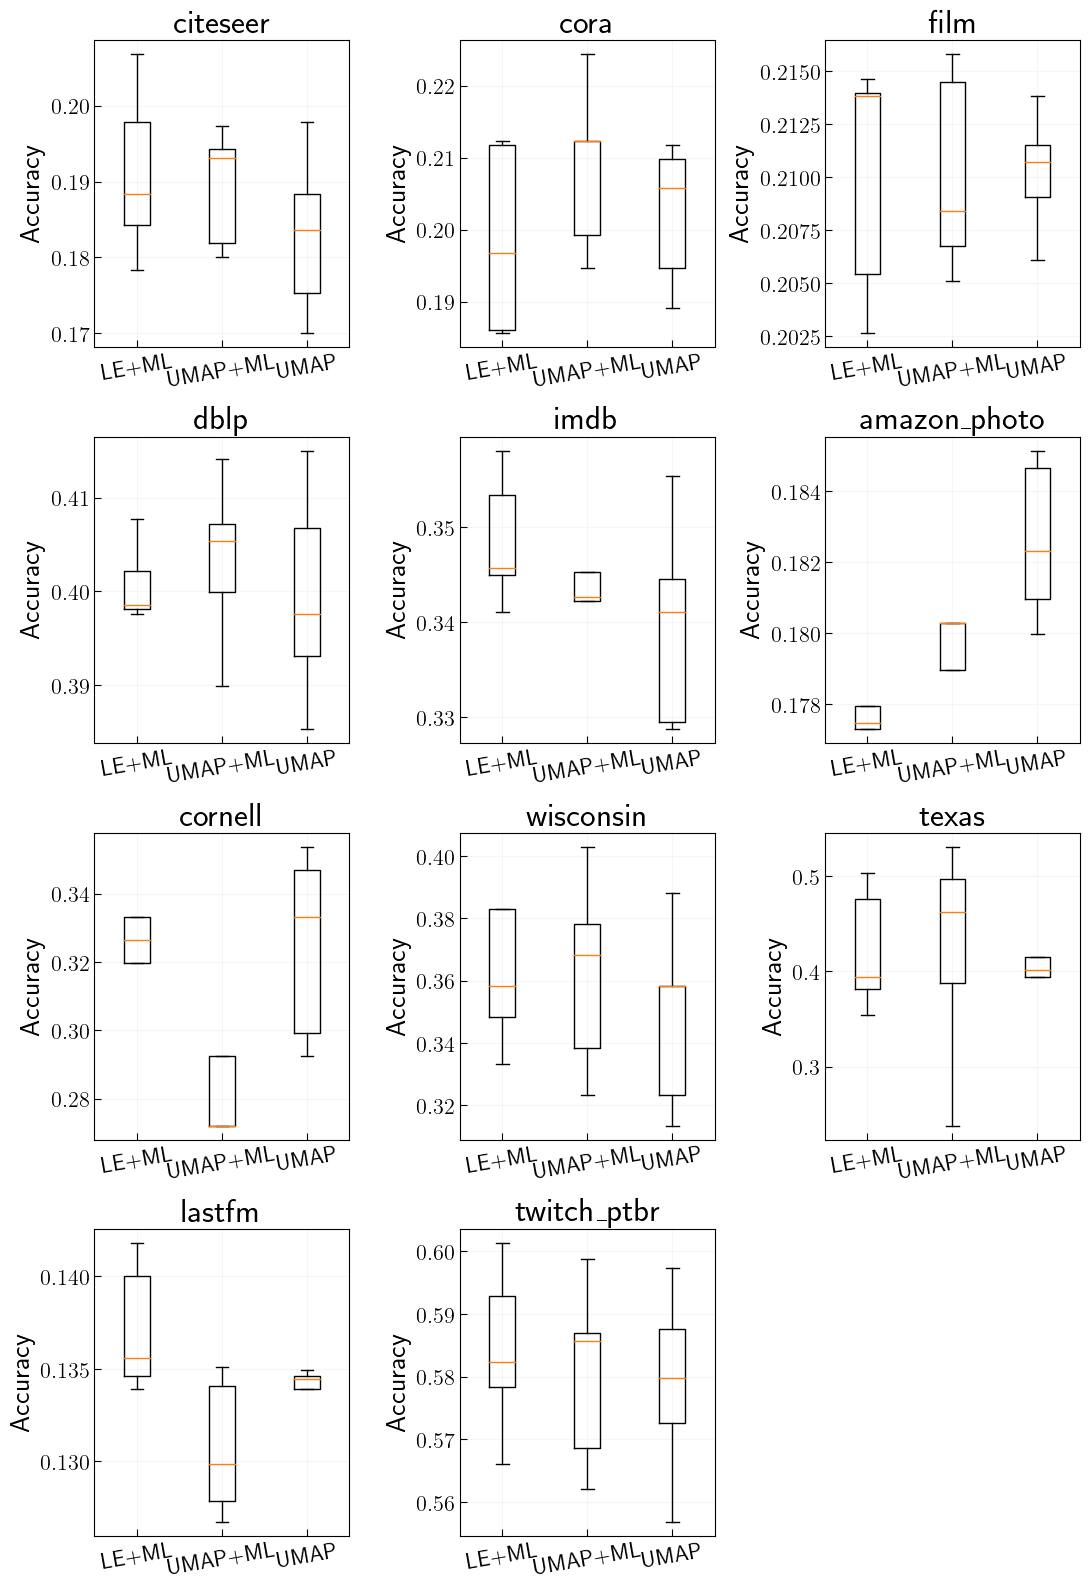

time: 4.73 s (started: 2023-04-21 10:14:14 +02:00)


In [84]:
def plot_nc_per_dataset(nc, title):
    plt.boxplot([nc['accuracy_le_ml'], nc['accuracy_umap_ml'], nc['accuracy_only_umap']], showfliers=False)
    plt.xticks([1, 2, 3], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel('Accuracy')
    plt.title(title)
    
plt.figure(figsize=(11, 16))

plt.subplot(4, 3, 1)
plot_nc_per_dataset(citeseer_nc, 'citeseer')
plt.subplot(4, 3, 2)
plot_nc_per_dataset(cora_nc, 'cora')
plt.subplot(4, 3, 3)
plot_nc_per_dataset(film_nc, 'film')
plt.subplot(4, 3, 4)
plot_nc_per_dataset(dblp_nc, 'dblp')
plt.subplot(4, 3, 5)
plot_nc_per_dataset(imdb_nc, 'imdb')
plt.subplot(4, 3, 6)
plot_nc_per_dataset(amazon_photo_nc, 'amazon_photo')
plt.subplot(4, 3, 7)
plot_nc_per_dataset(cornell_nc, 'cornell')
plt.subplot(4, 3, 8)
plot_nc_per_dataset(wisconsin_nc, 'wisconsin')
plt.subplot(4, 3, 9)
plot_nc_per_dataset(texas_nc, 'texas')
plt.subplot(4, 3, 10)
plot_nc_per_dataset(lastfm_nc, 'lastfm')
plt.subplot(4, 3, 11)
plot_nc_per_dataset(twitch_ptbr_nc, 'twitch_ptbr')

plt.tight_layout()

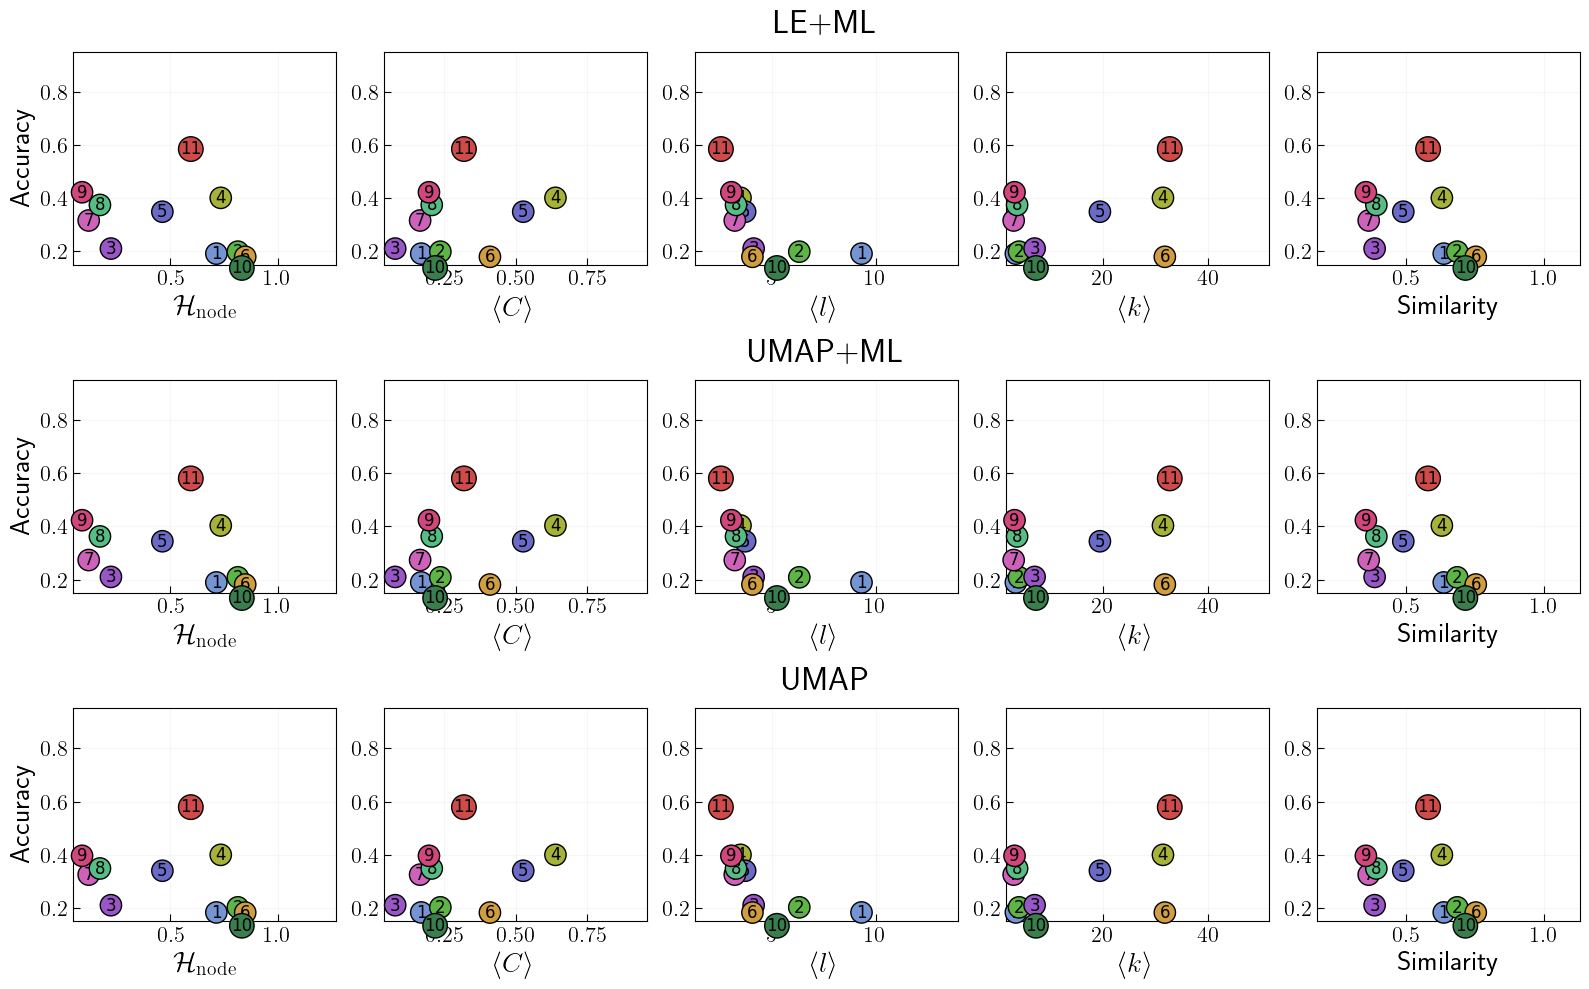

time: 1.64 s (started: 2023-04-21 10:14:23 +02:00)


In [85]:
nc_accuracy_le_ml = np.array([
    citeseer_nc['accuracy_le_ml'],
    cora_nc['accuracy_le_ml'],
    film_nc['accuracy_le_ml'],
    dblp_nc['accuracy_le_ml'],
    imdb_nc['accuracy_le_ml'],
    amazon_photo_nc['accuracy_le_ml'],
    cornell_nc['accuracy_le_ml'],
    wisconsin_nc['accuracy_le_ml'],
    texas_nc['accuracy_le_ml'],
    lastfm_nc['accuracy_le_ml'],
    twitch_ptbr_nc['accuracy_le_ml'],
])

nc_accuracy_umap_ml = np.array([
    citeseer_nc['accuracy_umap_ml'],
    cora_nc['accuracy_umap_ml'],
    film_nc['accuracy_umap_ml'],
    dblp_nc['accuracy_umap_ml'],
    imdb_nc['accuracy_umap_ml'],
    amazon_photo_nc['accuracy_umap_ml'],
    cornell_nc['accuracy_umap_ml'],
    wisconsin_nc['accuracy_umap_ml'],
    texas_nc['accuracy_umap_ml'],    
    lastfm_nc['accuracy_umap_ml'],
    twitch_ptbr_nc['accuracy_umap_ml'],
])

nc_accuracy_only_umap = np.array([
    citeseer_nc['accuracy_only_umap'],
    cora_nc['accuracy_only_umap'],
    film_nc['accuracy_only_umap'],
    dblp_nc['accuracy_only_umap'],
    imdb_nc['accuracy_only_umap'],
    amazon_photo_nc['accuracy_only_umap'],
    cornell_nc['accuracy_only_umap'],
    wisconsin_nc['accuracy_only_umap'],
    texas_nc['accuracy_only_umap'],
    lastfm_nc['accuracy_only_umap'],
    twitch_ptbr_nc['accuracy_only_umap'],
])

def plot_box_plot_per_option(nc_res, col):
    datasets = list(range(1, 15))
    for mean_acc, std_acc, h, c, name in zip(np.mean(nc_res, axis=1), np.std(nc_res, axis=1),
                                             df_all[col], colors, datasets):
        #plt.errorbar(h, mean_acc, yerr=std_acc, color=c, fmt='o')
        plt.text(h, mean_acc, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(0.15, 0.95)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_all_options_per_type(nc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # previously it was: 'r'
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_all_options_per_type(nc_accuracy_le_ml, 'LE+ML', i=1)
plot_all_options_per_type(nc_accuracy_umap_ml, 'UMAP+ML', i=6)
plot_all_options_per_type(nc_accuracy_only_umap, 'UMAP', i=11)
plt.tight_layout()


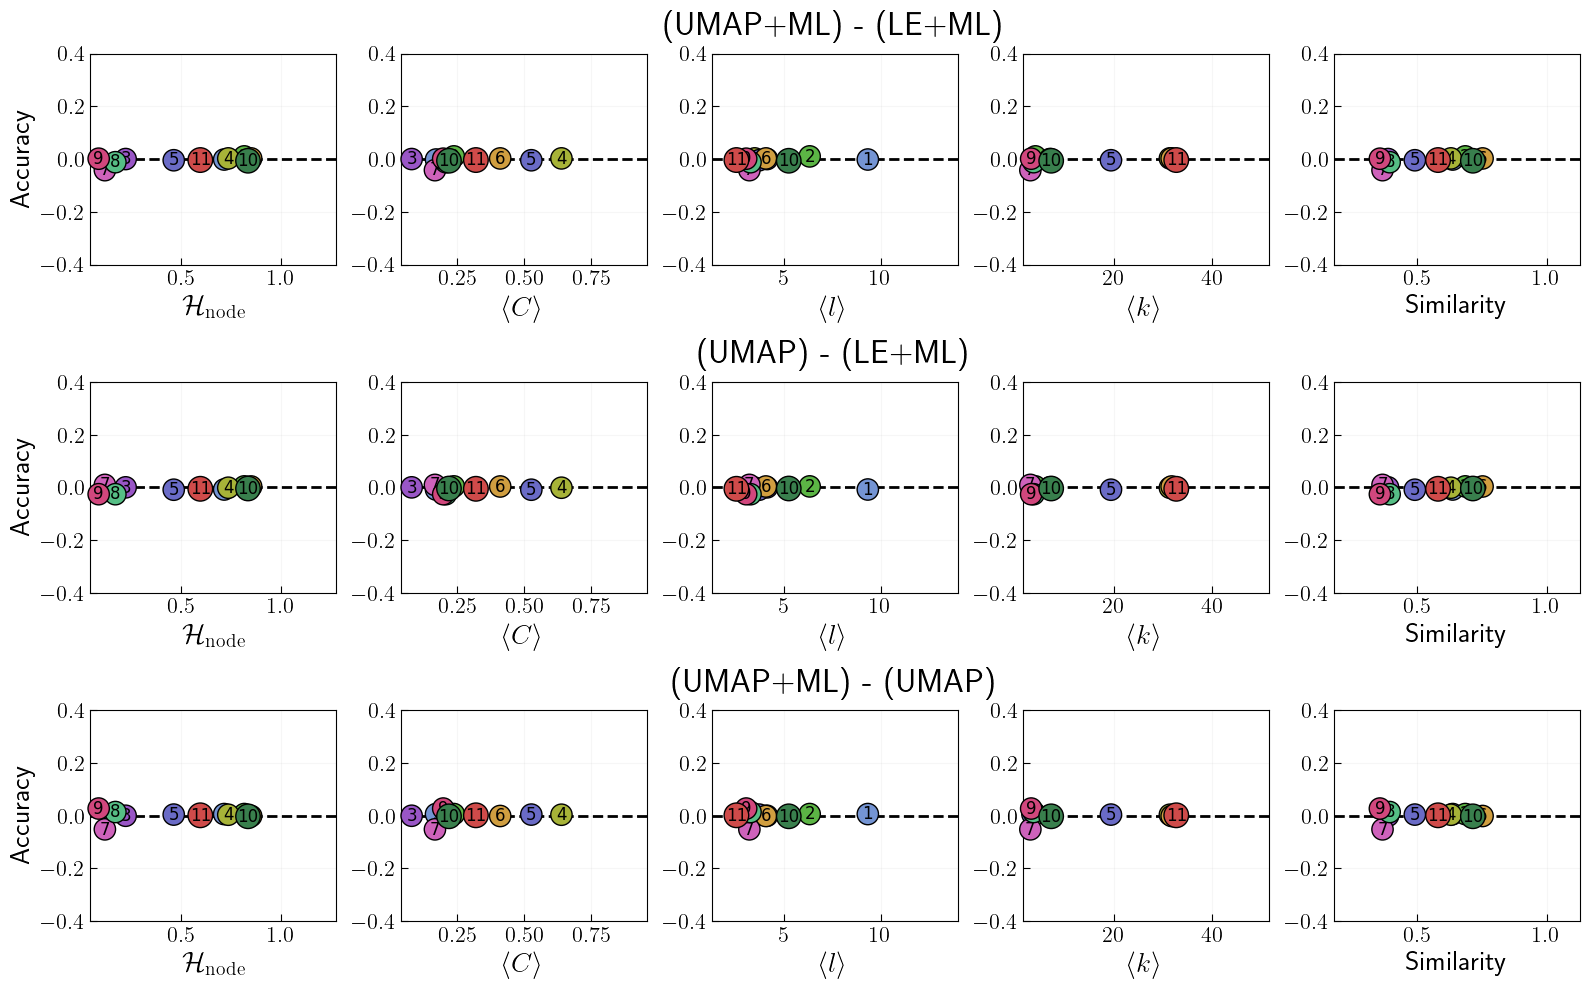

time: 2.39 s (started: 2023-04-21 10:14:25 +02:00)


In [86]:
def plot_all_options_difference(nc_res, title, ymin, ymax, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # it was 'r' previously
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_le_ml, title='(UMAP+ML) - (LE+ML)', i=1, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_only_umap - nc_accuracy_le_ml, title='(UMAP) - (LE+ML)', i=6, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.4, ymax=0.4)
plt.tight_layout()


In [30]:
# import pickle

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_true_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_le_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_true_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_umap_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_true_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_only_umap, f)
    

time: 6.83 ms (started: 2023-03-28 14:39:46 +02:00)


In [88]:
# import pickle

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_true_labels_random.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_le_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_true_labels_random.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_umap_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_true_labels_random.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_only_umap, f)
    

time: 541 µs (started: 2023-04-21 10:14:57 +02:00)


# Node classification (with hyperbolic distance)

In [26]:
def node_classification_hyperbolic(df_le_ml, df_umap_ml, df_only_umap, test_size=0.8, n_times=5):
    pos_le_ml = df_le_ml[['p1', 'p2', 'p3', 'hyp_rad']].values
    pos_umap_ml = df_umap_ml[['p1', 'p2', 'p3', 'hyp_rad']].values
    pos_only_umap = df_only_umap[['p1', 'p2', 'p3', 'hyp_rad']].values
    
    f1_le_ml, accuracy_le_ml = [], []
    f1_umap_ml, accuracy_umap_ml = [], []
    f1_only_umap, accuracy_only_umap = [], []
    
    for _ in tqdm(range(n_times)):
        y_pred, y_true = predict_labels_kneighbours_hyperbolic(pos_le_ml, df_le_ml['encoded_label'].values, test_size)
        f1_le_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_le_ml.append(accuracy_score(y_true, y_pred))

        y_pred, y_true = predict_labels_kneighbours_hyperbolic(pos_umap_ml, df_umap_ml['encoded_label'].values, test_size)
        f1_umap_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_umap_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours_hyperbolic(pos_only_umap, df_only_umap['encoded_label'].values, test_size)
        f1_only_umap.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_only_umap.append(accuracy_score(y_true, y_pred))
        
    return {
        'f1_le_ml': f1_le_ml,
        'f1_umap_ml': f1_umap_ml,
        'f1_only_umap': f1_only_umap,
        'accuracy_le_ml': accuracy_le_ml,
        'accuracy_umap_ml': accuracy_umap_ml,
        'accuracy_only_umap': accuracy_only_umap
    }


def predict_labels_kneighbours_hyperbolic(pos, labels, test_size, k_neighbours=5):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    
    neigh = KNeighborsClassifier(n_neighbors=k_neighbours, metric=compute_hyperbolic_distance)
    neigh.fit(pos_train, labels_train)
    
    predicted_labels = neigh.predict(pos_test)
    return predicted_labels, labels_test
    

def compute_hyperbolic_distance(p1, p2):
    r1 = p1[-1]
    r2 = p2[-1]
    theta = np.arccos(np.clip(np.dot(p1[:-1], p2[:-1]) / (np.linalg.norm(p1[:-1]) * np.linalg.norm(p2[:-1])), -1, 1))
    
    if theta == 0:
        return np.fabs(r1 - r2)
    else:
        dist = 0.5 * ((1 - np.cos(theta)) * np.cosh(r1 + r2) + (1 + np.cos(theta)) * np.cosh(r1 - r2))
        return np.arccosh(dist)

time: 2.84 ms (started: 2023-03-24 17:04:29 +01:00)


In [27]:
%%time

citeseer_nc_hyp = node_classification_hyperbolic(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)
cora_nc_hyp = node_classification_hyperbolic(cora_le_ml, cora_umap_ml, cora_only_umap)
film_nc_hyp = node_classification_hyperbolic(film_le_ml, film_umap_ml, film_only_umap)
dblp_nc_hyp = node_classification_hyperbolic(dblp_le_ml, dblp_umap_ml, dblp_only_umap)
imdb_nc_hyp = node_classification_hyperbolic(imdb_le_ml, imdb_umap_ml, imdb_only_umap)
amazon_photo_nc_hyp = node_classification_hyperbolic(amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)
cornell_nc_hyp = node_classification_hyperbolic(cornell_le_ml, cornell_umap_ml, cornell_only_umap)
wisconsin_nc_hyp = node_classification_hyperbolic(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)
texas_nc_hyp = node_classification_hyperbolic(texas_le_ml, texas_umap_ml, texas_only_umap)
lastfm_nc_hyp = node_classification_hyperbolic(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)
twitch_ptbr_nc_hyp = node_classification_hyperbolic(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

100%|██████████| 5/5 [03:06<00:00, 37.38s/it]

CPU times: user 2h 59min 46s, sys: 1.12 s, total: 2h 59min 47s
Wall time: 2h 59min 57s
time: 2h 59min 57s (started: 2023-03-24 17:04:29 +01:00)


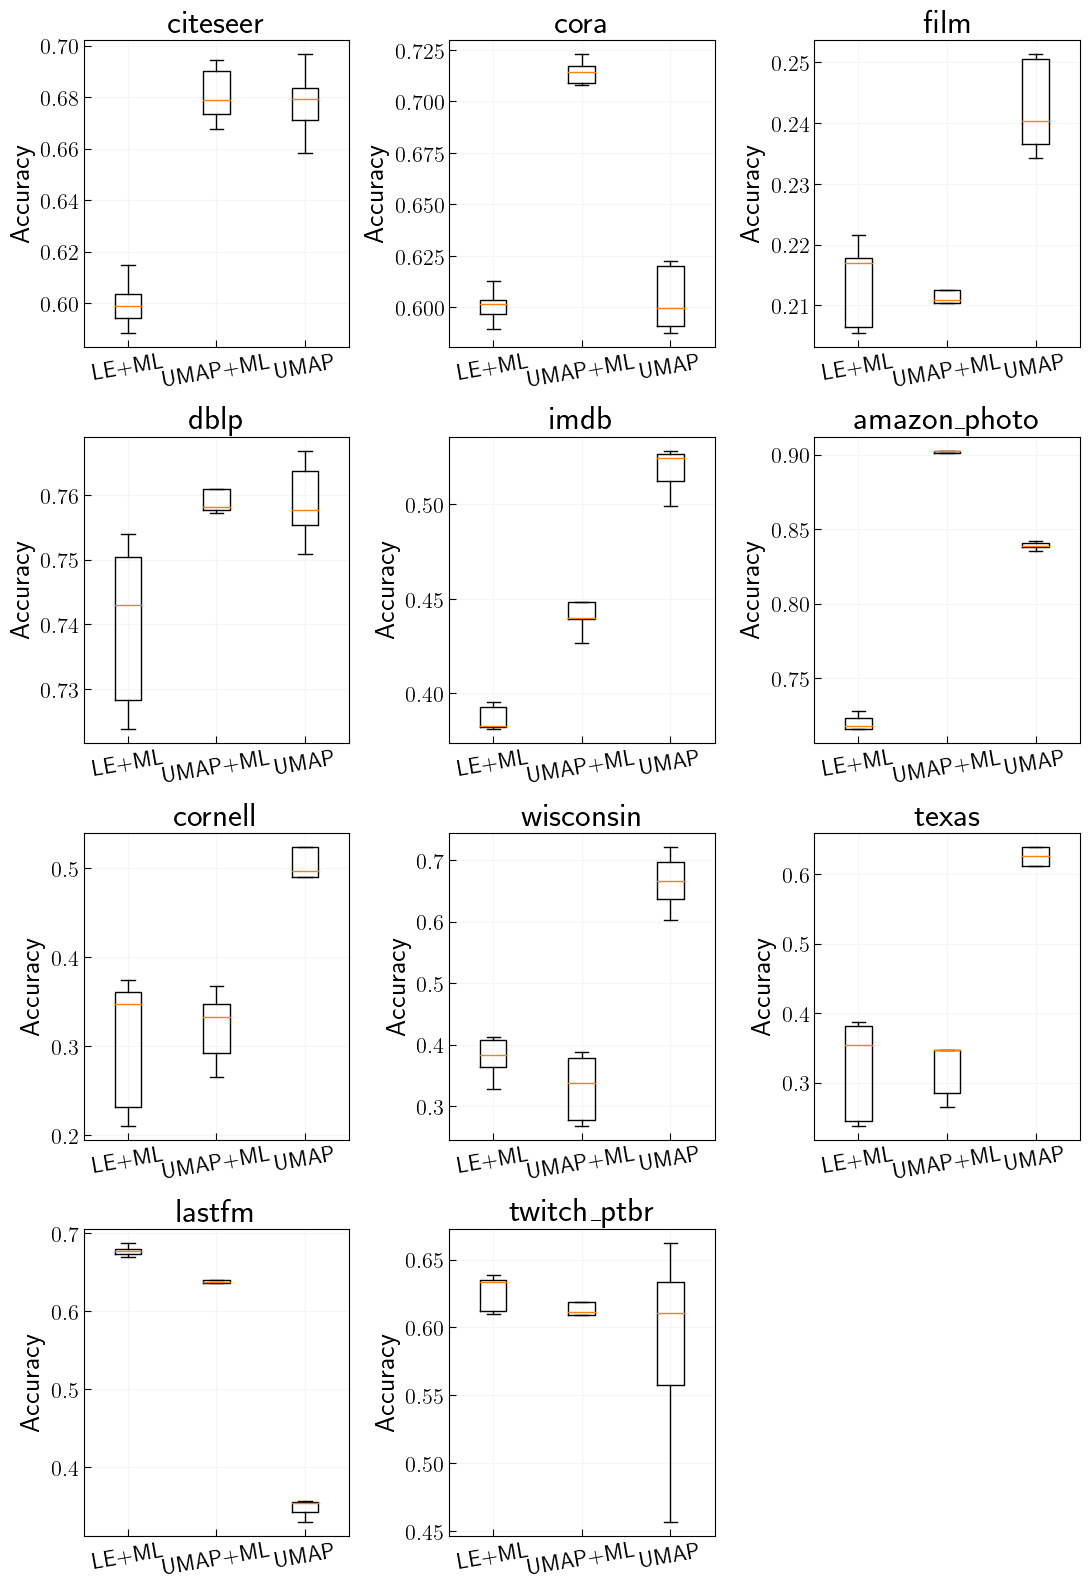

time: 1.11 s (started: 2023-03-24 20:04:26 +01:00)


In [28]:
plt.figure(figsize=(11, 16))

plt.subplot(4, 3, 1)
plot_nc_per_dataset(citeseer_nc_hyp, 'citeseer')
plt.subplot(4, 3, 2)
plot_nc_per_dataset(cora_nc_hyp, 'cora')
plt.subplot(4, 3, 3)
plot_nc_per_dataset(film_nc_hyp, 'film')
plt.subplot(4, 3, 4)
plot_nc_per_dataset(dblp_nc_hyp, 'dblp')
plt.subplot(4, 3, 5)
plot_nc_per_dataset(imdb_nc_hyp, 'imdb')
plt.subplot(4, 3, 6)
plot_nc_per_dataset(amazon_photo_nc_hyp, 'amazon_photo')
plt.subplot(4, 3, 7)
plot_nc_per_dataset(cornell_nc_hyp, 'cornell')
plt.subplot(4, 3, 8)
plot_nc_per_dataset(wisconsin_nc_hyp, 'wisconsin')
plt.subplot(4, 3, 9)
plot_nc_per_dataset(texas_nc_hyp, 'texas')
plt.subplot(4, 3, 10)
plot_nc_per_dataset(lastfm_nc_hyp, 'lastfm')
plt.subplot(4, 3, 11)
plot_nc_per_dataset(twitch_ptbr_nc_hyp, 'twitch_ptbr')

plt.tight_layout()

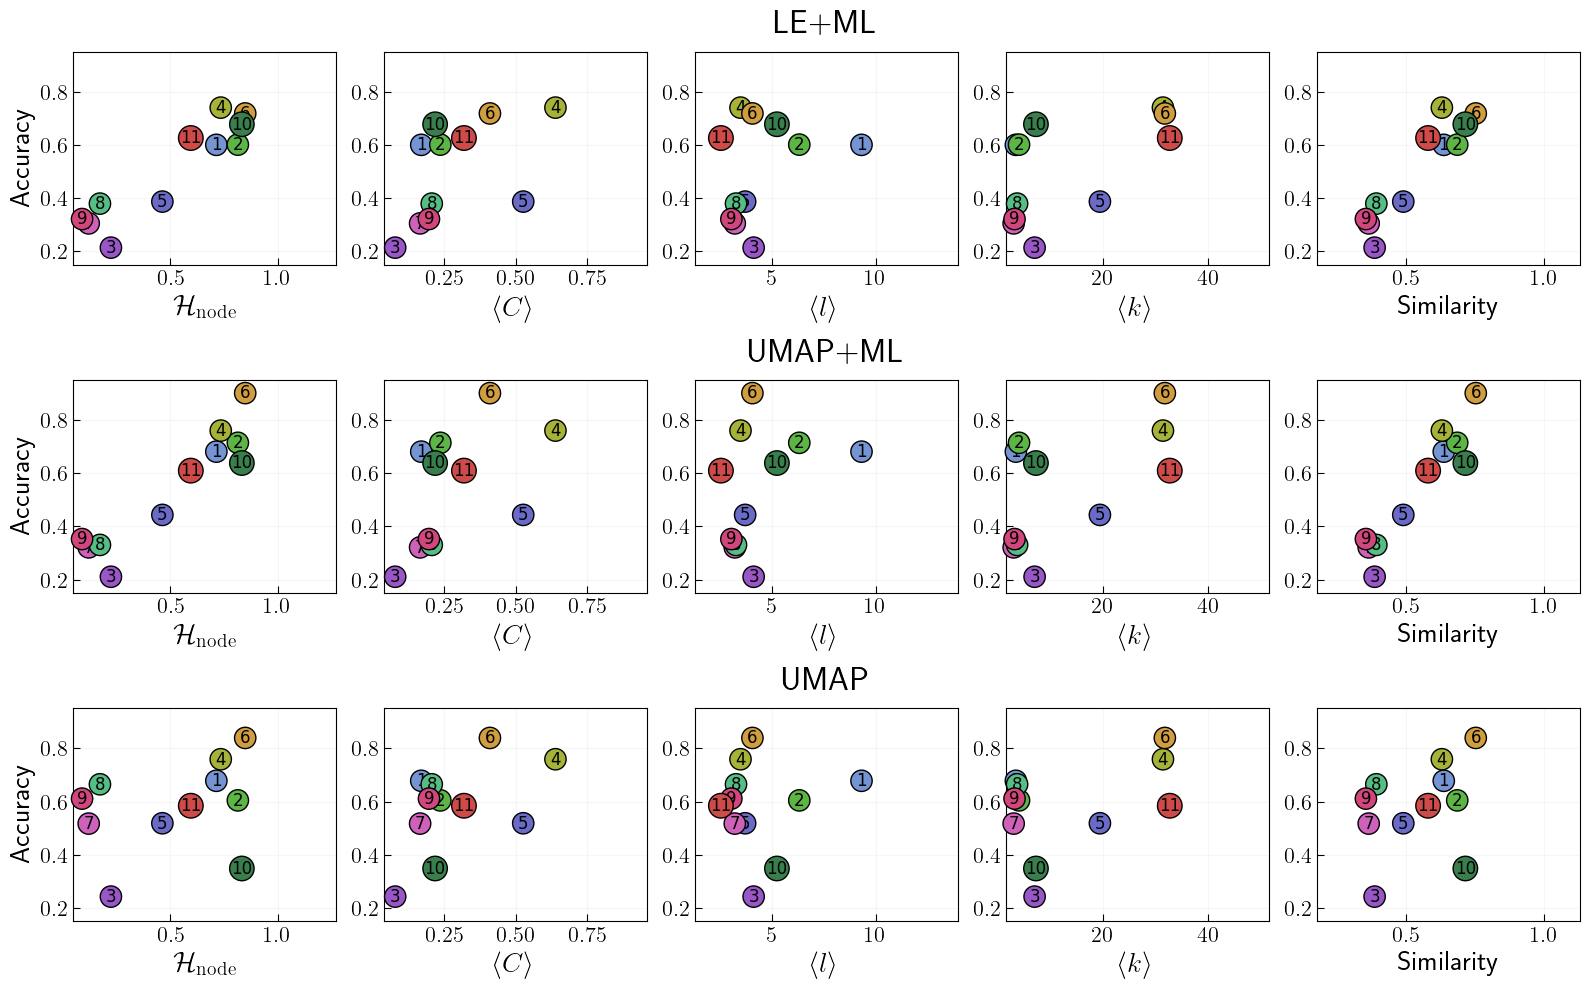

time: 1.27 s (started: 2023-03-24 20:04:28 +01:00)


In [29]:
nc_accuracy_le_ml_hyp = np.array([
    citeseer_nc_hyp['accuracy_le_ml'],
    cora_nc_hyp['accuracy_le_ml'],
    film_nc_hyp['accuracy_le_ml'],
    dblp_nc_hyp['accuracy_le_ml'],
    imdb_nc_hyp['accuracy_le_ml'],
    amazon_photo_nc_hyp['accuracy_le_ml'],
    cornell_nc_hyp['accuracy_le_ml'],
    wisconsin_nc_hyp['accuracy_le_ml'],
    texas_nc_hyp['accuracy_le_ml'],
    lastfm_nc_hyp['accuracy_le_ml'],
    twitch_ptbr_nc_hyp['accuracy_le_ml'],
])

nc_accuracy_umap_ml_hyp = np.array([
    citeseer_nc_hyp['accuracy_umap_ml'],
    cora_nc_hyp['accuracy_umap_ml'],
    film_nc_hyp['accuracy_umap_ml'],
    dblp_nc_hyp['accuracy_umap_ml'],
    imdb_nc_hyp['accuracy_umap_ml'],
    amazon_photo_nc_hyp['accuracy_umap_ml'],
    cornell_nc_hyp['accuracy_umap_ml'],
    wisconsin_nc_hyp['accuracy_umap_ml'],
    texas_nc_hyp['accuracy_umap_ml'],    
    lastfm_nc_hyp['accuracy_umap_ml'],
    twitch_ptbr_nc_hyp['accuracy_umap_ml'],
])

nc_accuracy_only_umap_hyp = np.array([
    citeseer_nc_hyp['accuracy_only_umap'],
    cora_nc_hyp['accuracy_only_umap'],
    film_nc_hyp['accuracy_only_umap'],
    dblp_nc_hyp['accuracy_only_umap'],
    imdb_nc_hyp['accuracy_only_umap'],
    amazon_photo_nc_hyp['accuracy_only_umap'],
    cornell_nc_hyp['accuracy_only_umap'],
    wisconsin_nc_hyp['accuracy_only_umap'],
    texas_nc_hyp['accuracy_only_umap'],
    lastfm_nc_hyp['accuracy_only_umap'],
    twitch_ptbr_nc_hyp['accuracy_only_umap'],
])

def plot_box_plot_per_option(nc_res, col):
    datasets = list(range(1, 15))
    for mean_acc, std_acc, h, c, name in zip(np.mean(nc_res, axis=1), np.std(nc_res, axis=1),
                                             df_all[col], colors, datasets):
        #plt.errorbar(h, mean_acc, yerr=std_acc, color=c, fmt='o')
        plt.text(h, mean_acc, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(0.15, 0.95)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_all_options_per_type(nc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # previously it was: 'r'
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_all_options_per_type(nc_accuracy_le_ml_hyp, 'LE+ML', i=1)
plot_all_options_per_type(nc_accuracy_umap_ml_hyp, 'UMAP+ML', i=6)
plot_all_options_per_type(nc_accuracy_only_umap_hyp, 'UMAP', i=11)
plt.tight_layout()


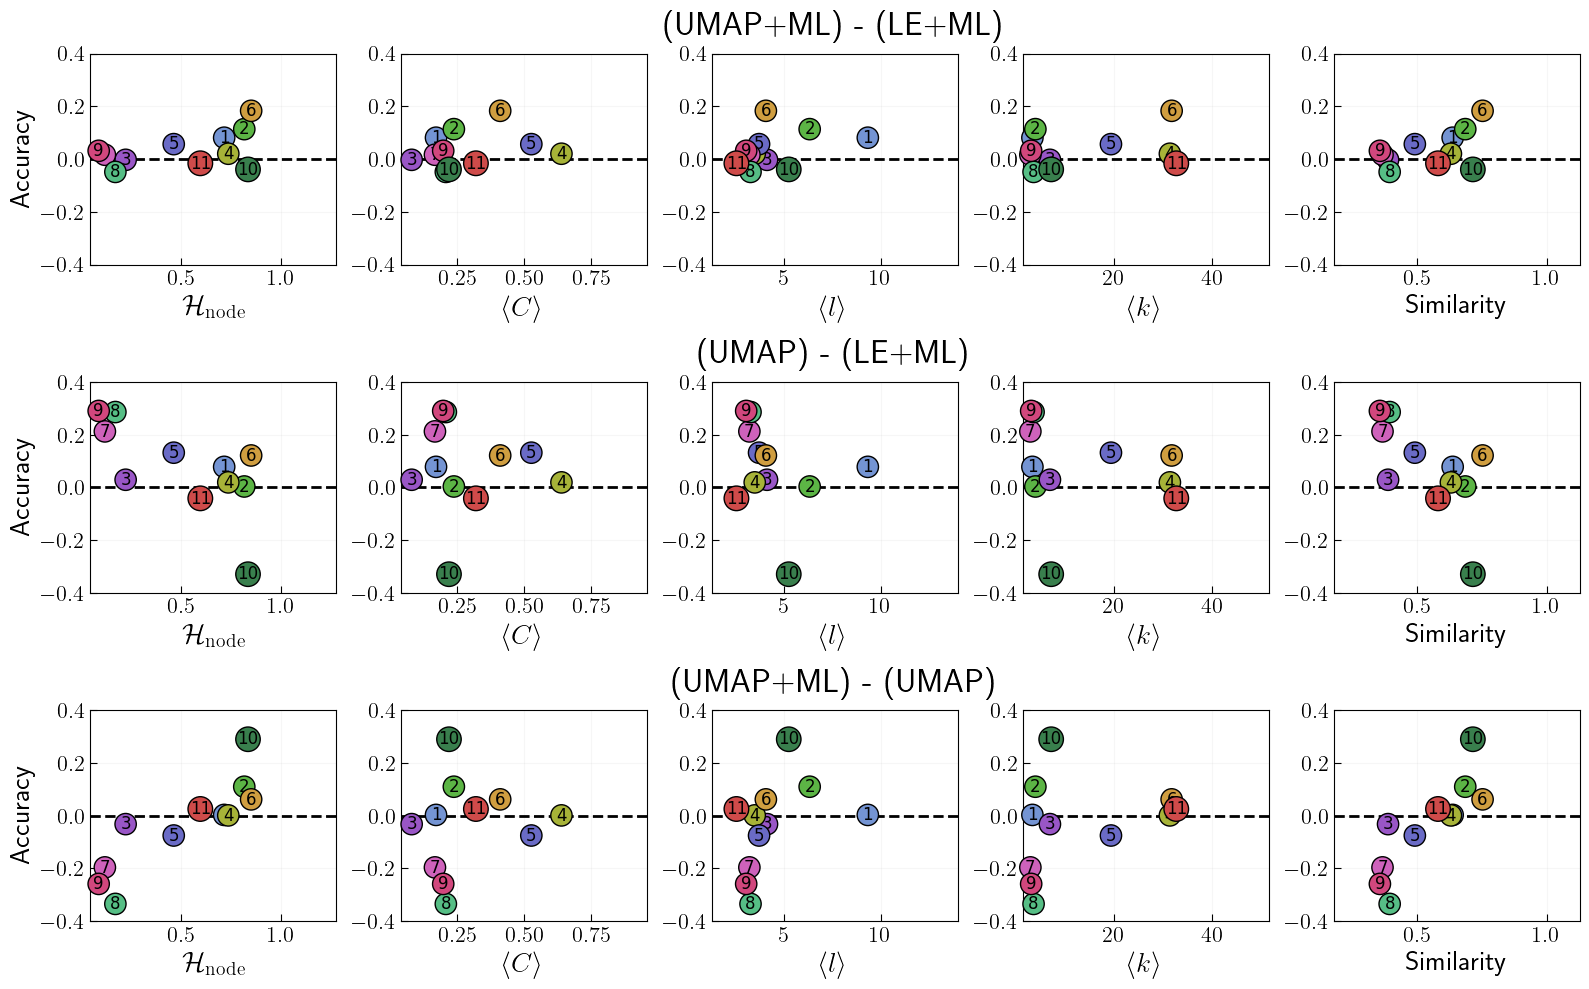

time: 1.46 s (started: 2023-03-24 20:04:29 +01:00)


In [30]:
def plot_all_options_difference(nc_res, title, ymin, ymax, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity')
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_all_options_difference(nc_accuracy_umap_ml_hyp - nc_accuracy_le_ml_hyp, title='(UMAP+ML) - (LE+ML)', i=1, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_only_umap_hyp - nc_accuracy_le_ml_hyp, title='(UMAP) - (LE+ML)', i=6, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_umap_ml_hyp - nc_accuracy_only_umap_hyp, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.4, ymax=0.4)
plt.tight_layout()

## Greedy routing

In [31]:
def load_greedy_routing(path):    
    ps_le_ml = pd.read_csv(glob.glob(f"{path}/le_ml/*.mgr_fixed")[0])['p_s'].values[0]
    ps_umap_ml = pd.read_csv(glob.glob(f"{path}/umap_ml/*.mgr_fixed")[0])['p_s'].values[0]
    ps_only_umap = pd.read_csv(glob.glob(f"{path}/only_umap/*.mgr_fixed")[0])['p_s'].values[0]
    return {
        'ps_le_ml': ps_le_ml,
        'ps_umap_ml': ps_umap_ml,
        'ps_only_umap': ps_only_umap
    }


base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/"

citeseer_gr = load_greedy_routing(f"{base_path}/citeseer/umap")
cora_gr = load_greedy_routing(f"{base_path}/cora/umap")
film_gr = load_greedy_routing(f"{base_path}/film/umap")
dblp_gr = load_greedy_routing(f"{base_path}/dblp/umap")
imdb_gr = load_greedy_routing(f"{base_path}/imdb/umap")
amazon_photo_gr = load_greedy_routing(f"{base_path}/amazon_photo/umap")
cornell_gr = load_greedy_routing(f"{base_path}/webkb/cornell/umap")
wisconsin_gr = load_greedy_routing(f"{base_path}/webkb/wisconsin/umap")
texas_gr = load_greedy_routing(f"{base_path}/webkb/texas/umap")
lastfm_gr = load_greedy_routing(f"{base_path}/lastfm_asia/umap")
twitch_ptbr_gr = load_greedy_routing(f"{base_path}/twitch/PTBR/umap")

time: 58.8 ms (started: 2023-03-24 20:04:30 +01:00)


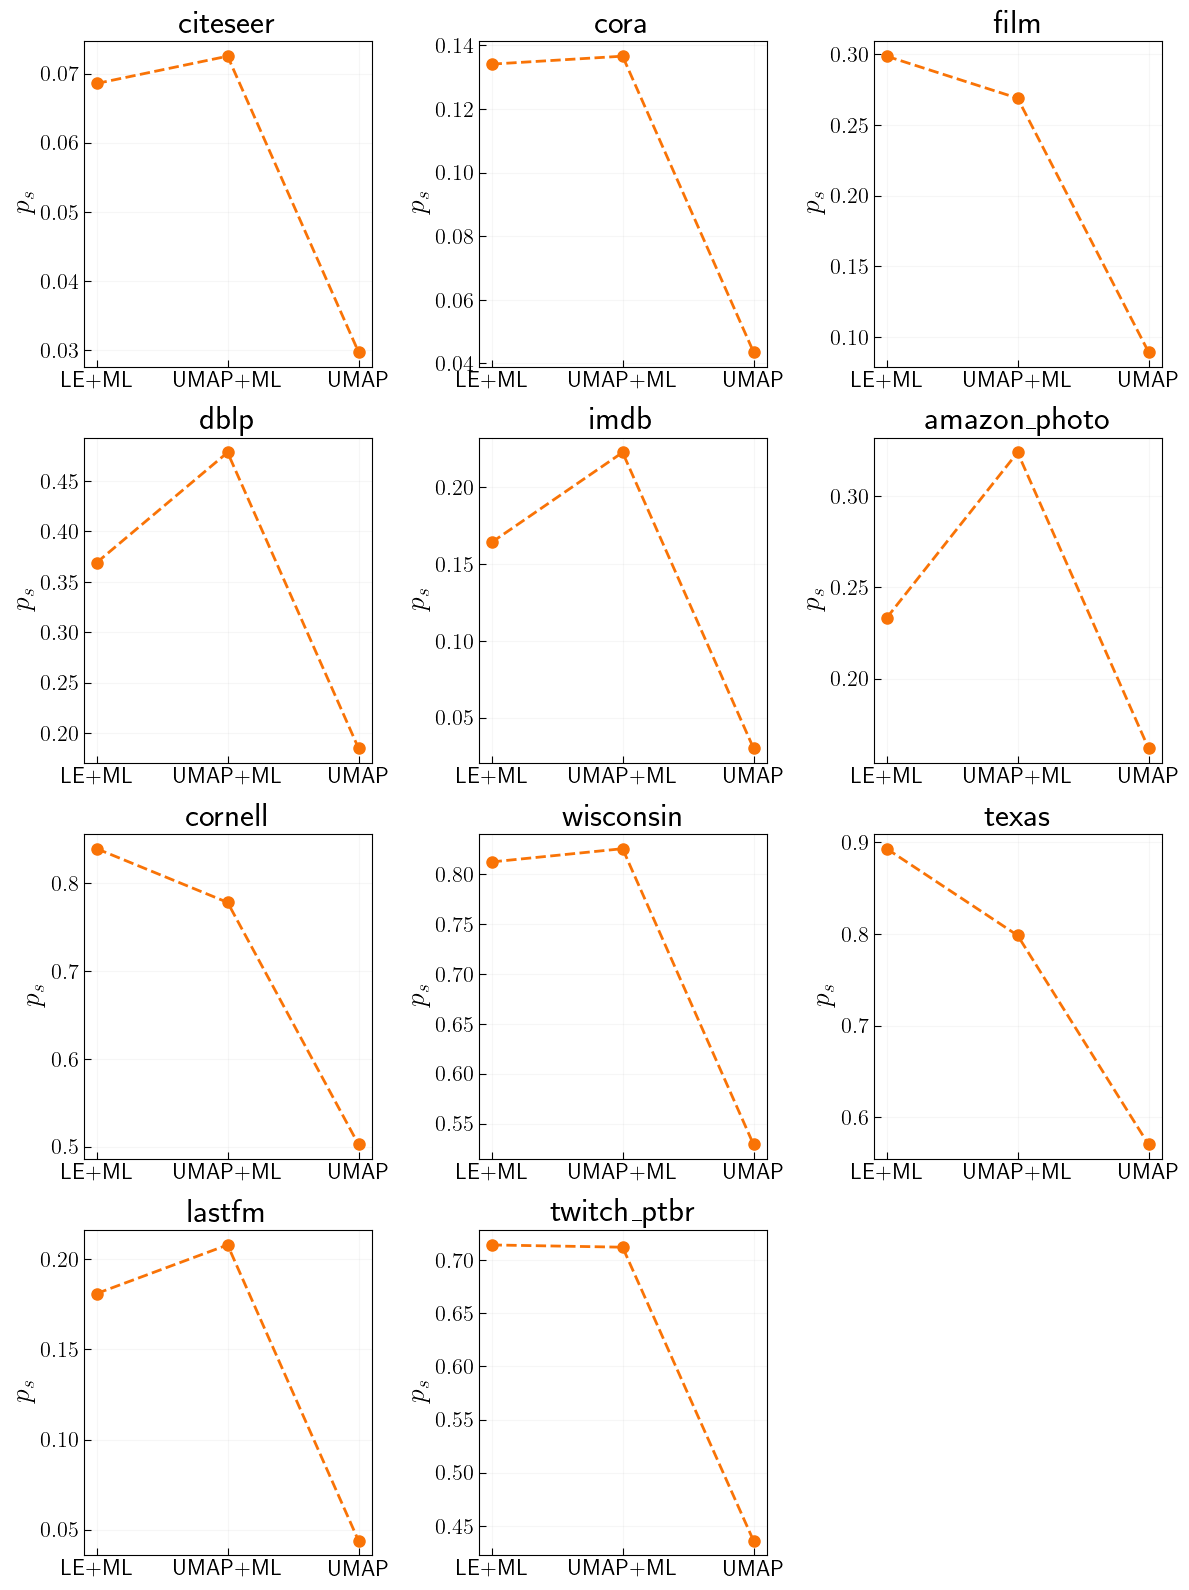

time: 707 ms (started: 2023-03-24 20:04:30 +01:00)


In [32]:
def plot_gr_per_dataset(ps, title):
    plt.plot([ps['ps_le_ml'], ps['ps_umap_ml'], ps['ps_only_umap']], 
             color='xkcd:orange', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'])
    plt.ylabel(r'$p_s$')
    plt.title(title)
    
plt.figure(figsize=(12, 16))

plt.subplot(4, 3, 1)
plot_gr_per_dataset(citeseer_gr, 'citeseer')
plt.subplot(4, 3, 2)
plot_gr_per_dataset(cora_gr, 'cora')
plt.subplot(4, 3, 3)
plot_gr_per_dataset(film_gr, 'film')
plt.subplot(4, 3, 4)
plot_gr_per_dataset(dblp_gr, 'dblp')
plt.subplot(4, 3, 5)
plot_gr_per_dataset(imdb_gr, 'imdb')
plt.subplot(4, 3, 6)
plot_gr_per_dataset(amazon_photo_gr, 'amazon_photo')
plt.subplot(4, 3, 7)
plot_gr_per_dataset(cornell_gr, 'cornell')
plt.subplot(4, 3, 8)
plot_gr_per_dataset(wisconsin_gr, 'wisconsin')
plt.subplot(4, 3, 9)
plot_gr_per_dataset(texas_gr, 'texas')
plt.subplot(4, 3, 10)
plot_gr_per_dataset(lastfm_gr, 'lastfm')
plt.subplot(4, 3, 11)
plot_gr_per_dataset(twitch_ptbr_gr, 'twitch_ptbr')

plt.tight_layout()

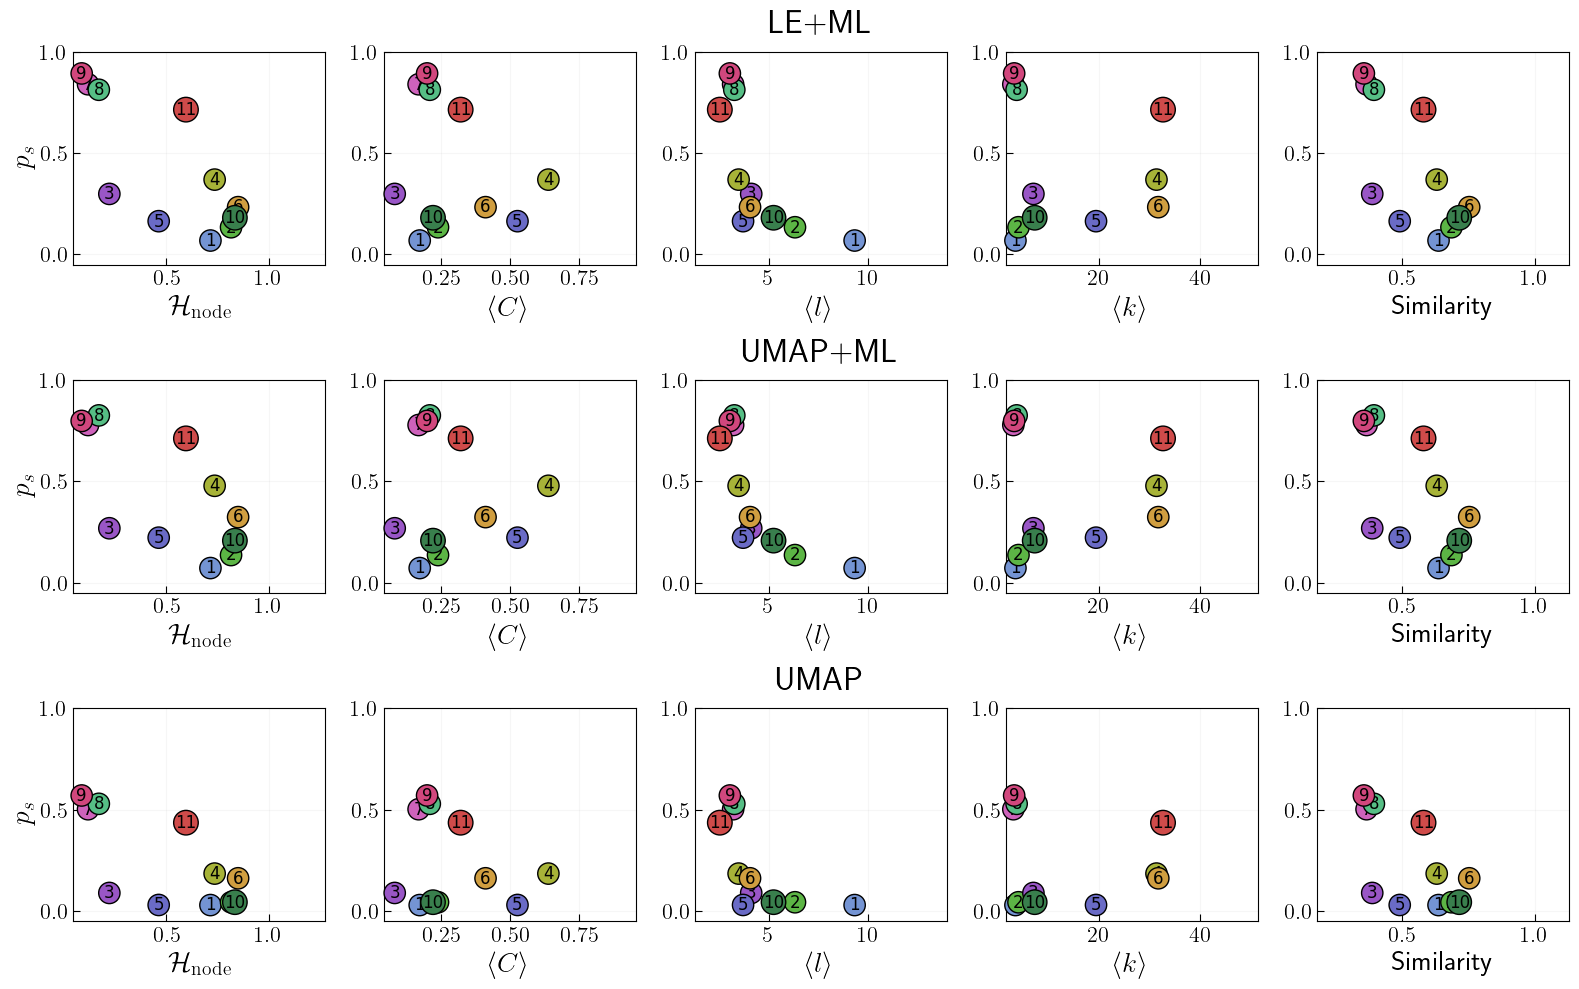

time: 1.22 s (started: 2023-03-24 20:04:31 +01:00)


In [33]:
ps_le_ml = np.array([
    citeseer_gr['ps_le_ml'],
    cora_gr['ps_le_ml'],
    film_gr['ps_le_ml'],
    dblp_gr['ps_le_ml'],
    imdb_gr['ps_le_ml'],
    amazon_photo_gr['ps_le_ml'],
    cornell_gr['ps_le_ml'],
    wisconsin_gr['ps_le_ml'],
    texas_gr['ps_le_ml'],
    lastfm_gr['ps_le_ml'],
    twitch_ptbr_gr['ps_le_ml'],
])

ps_umap_ml = np.array([
    citeseer_gr['ps_umap_ml'],
    cora_gr['ps_umap_ml'],
    film_gr['ps_umap_ml'],
    dblp_gr['ps_umap_ml'],
    imdb_gr['ps_umap_ml'],
    amazon_photo_gr['ps_umap_ml'],
    cornell_gr['ps_umap_ml'],
    wisconsin_gr['ps_umap_ml'],
    texas_gr['ps_umap_ml'],    
    lastfm_gr['ps_umap_ml'],
    twitch_ptbr_gr['ps_umap_ml'],
])

ps_only_umap = np.array([
    citeseer_gr['ps_only_umap'],
    cora_gr['ps_only_umap'],
    film_gr['ps_only_umap'],
    dblp_gr['ps_only_umap'],
    imdb_gr['ps_only_umap'],
    amazon_photo_gr['ps_only_umap'],
    cornell_gr['ps_only_umap'],
    wisconsin_gr['ps_only_umap'],
    texas_gr['ps_only_umap'],
    lastfm_gr['ps_only_umap'],
    twitch_ptbr_gr['ps_only_umap'],
])


def plot_gr_per_option(gr_res, col):
    datasets = list(range(1, 15))
    for gr, h, c, name in zip(gr_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 1)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_gr_all_options_per_type(gr_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_gr_per_option(gr_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$p_s$')

    plt.subplot(3, 5, i+1)
    plot_gr_per_option(gr_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_gr_per_option(gr_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_gr_per_option(gr_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_gr_per_option(gr_res, 'similarity')
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_gr_all_options_per_type(ps_le_ml, 'LE+ML', i=1)
plot_gr_all_options_per_type(ps_umap_ml, 'UMAP+ML', i=6)
plot_gr_all_options_per_type(ps_only_umap, 'UMAP', i=11)
plt.tight_layout()


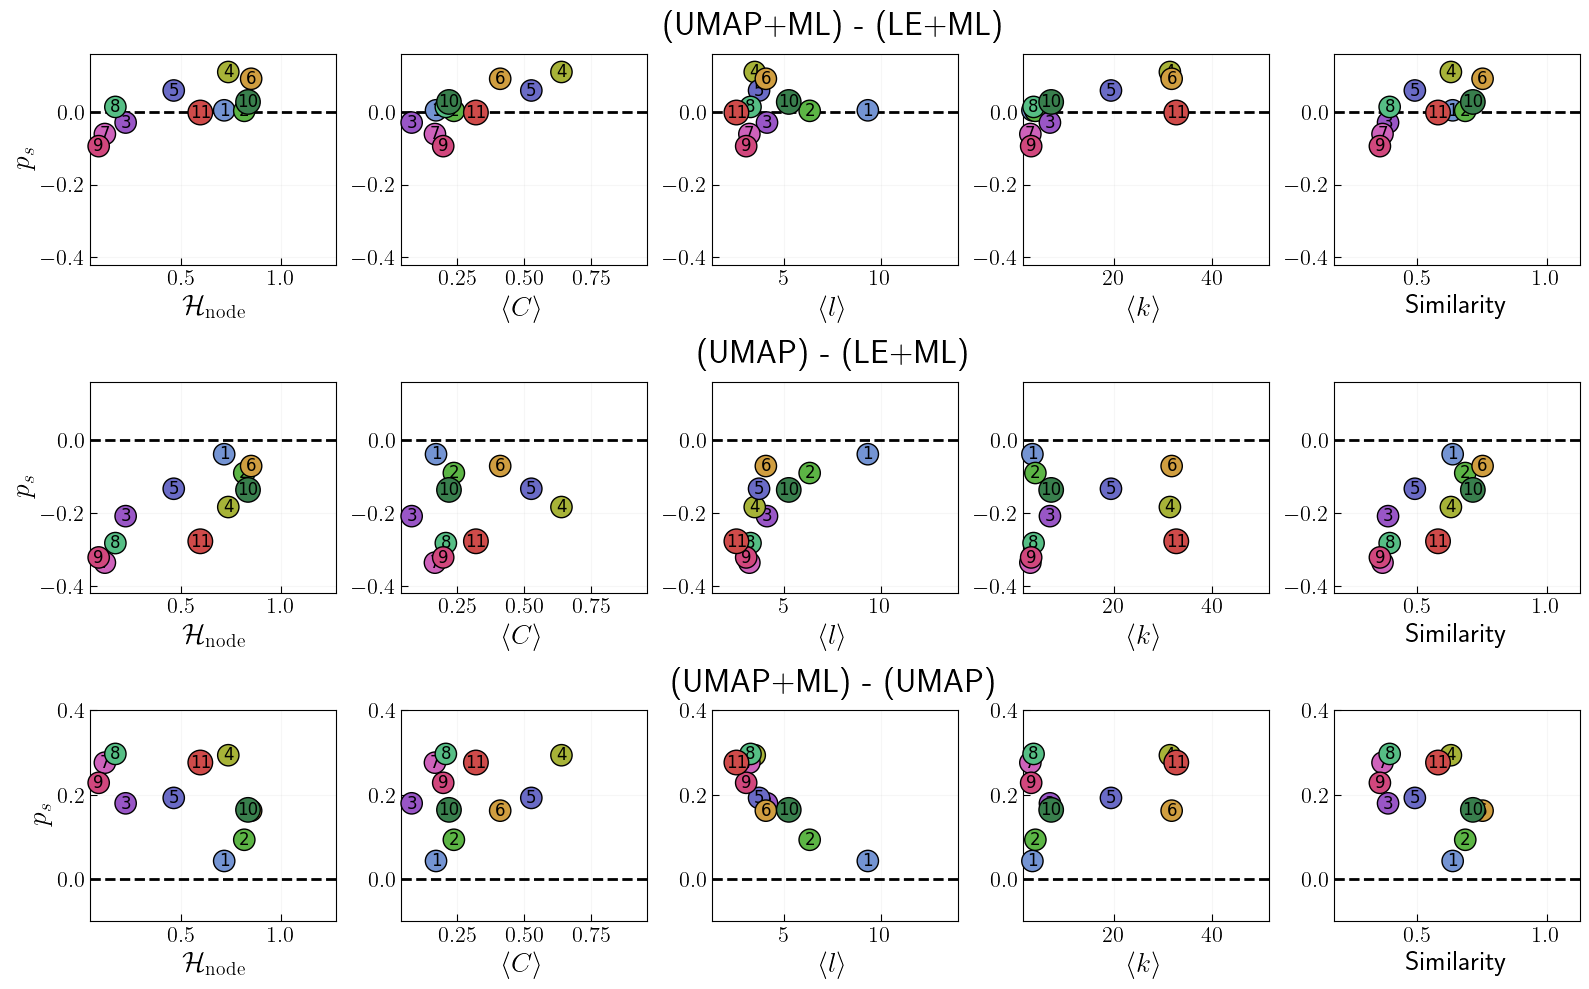

time: 1.38 s (started: 2023-03-24 20:04:33 +01:00)


In [34]:
def plot_gr_all_options_difference(gr_res, title, ymin=-0.42, ymax=0.16, i=1):
    plt.subplot(3, 5, i)
    plot_gr_per_option(gr_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$p_s$')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_gr_per_option(gr_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_gr_per_option(gr_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_gr_per_option(gr_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_gr_per_option(gr_res, 'similarity')
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_gr_all_options_difference(ps_umap_ml - ps_le_ml, title='(UMAP+ML) - (LE+ML)', i=1)
plot_gr_all_options_difference(ps_only_umap - ps_le_ml, title='(UMAP) - (LE+ML)', i=6)
plot_gr_all_options_difference(ps_umap_ml - ps_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.1, ymax=0.4)
plt.tight_layout()

## Community concentration

In [35]:
%load_ext Cython

time: 321 ms (started: 2023-03-24 20:04:34 +01:00)


In [36]:
%%cython --compile-args=-ffast-math --compile-args=-funroll-loops --compile-args=-ftree-loop-distribution --compile-args=-mtune=native
# distutils: language = c++

cimport cython
cimport numpy as np
import numpy as np
from libcpp.vector cimport vector
from libcpp cimport bool

from libc.math cimport exp, pi, cos, sin, sqrt, pow, acos
    
cdef class FractionNodesVsNeighbours:
    
    cdef int dim, n_labels
    cdef list labels, nodes
    cdef public np.float64_t[:, :] distance_matrix
    cdef public np.float64_t[:] cluster_probabilities
    
    
    def __init__(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas, list labels):
        # NOTE: list of labels should start with 0 and go to (n_labels - 1)
        self.dim = dim
        self.distance_matrix = self.get_distance_matrix(dim, positions, thetas)
        self.labels = labels
        self.nodes = list(np.arange(len(labels)))
        self.n_labels = len(set(self.labels))
        self.compute_probability_per_label()
        
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision      
    cdef compute_probability_per_label(self):
        cdef dict n_nodes_per_group = {}
        for i, l in enumerate(self.labels):
            if l not in n_nodes_per_group:
                n_nodes_per_group[l] = 0
            n_nodes_per_group[l] += 1
            
        self.cluster_probabilities = np.zeros(self.n_labels)    
        for l, v in n_nodes_per_group.items():
            self.cluster_probabilities[l] = v / len(self.labels)
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_all_classes(self, int num_n_neighbours=30):
        """
        Format of the output
        
        [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...]
        """
        cdef dict results = {}
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)        
        for n_neighbours in all_n_neighbours:
            results[n_neighbours] = self.iterate_over_nodes(self.nodes, n_neighbours)
        return results
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_per_class(self, int num_n_neighbours=30):
        """
        Format of the output
        
        {label_1: [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...],
         label_2: ...}
        """
        cdef dict nodes_per_group = {}    
        for i, l in enumerate(self.labels):
            if l not in nodes_per_group:
                nodes_per_group[l] = []
            nodes_per_group[l].append(i)

        cdef dict results = {}
        cdef dict res = {}
        # Start with a node and its neighbour (not with 1)
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)
        for l, nodes_to_consider in nodes_per_group.items():
            res = {}
            for n_neighbours in all_n_neighbours:
                res[n_neighbours] = self.iterate_over_nodes(nodes_to_consider, n_neighbours)
            results[l] = res
            print(f'Done for class {l}/{self.n_labels}')
        return results

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision
    cdef iterate_over_nodes(self, list nodes_to_consider, int n_neighbours):
        all_fraction = []
        for n1 in nodes_to_consider:
            neighbours = []
            for n2 in self.nodes:
                # Here I iterate over the same node, i.e., distance=0
                neighbours.append((self.distance_matrix[n1, n2], self.labels[n2]))
            
            neighbours = sorted(neighbours, key=lambda x: x[0])
            neighbours = [x[1] for x in neighbours[:n_neighbours]]
            
            l1 = self.labels[n1]
            fraction = neighbours.count(l1) / n_neighbours
            # Weighted by the cluster probability (size of the cluster)
            all_fraction.append(fraction / self.cluster_probabilities[l1])
        return all_fraction

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas):
        if dim == 1:
            return self.get_distance_matrix_S1(thetas)
        else:
            return self.get_distance_matrix_SD(dim, positions)
        
        
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_S1(self, np.float64_t[:] thetas):
        cdef int size = len(thetas)
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = pi - abs(pi - abs(thetas[i] - thetas[j]))
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_SD(self, int dim, np.float64_t[:, :] positions):
        cdef int size = positions.shape[0]
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = self.compute_angle_vectors(dim, positions[i], positions[j])
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef compute_angle_vectors(self, int dim, np.float64_t[:] v1, np.float64_t[:] v2):
        cdef float angle = 0, norm1 = 0, norm2 = 0
        for i in range(dim + 1): 
            angle += v1[i] * v2[i]
            norm1 += v1[i] * v1[i]
            norm2 += v2[i] * v2[i]
        
        norm1 /= sqrt(norm1)
        norm2 /= sqrt(norm2)
        cdef float result = angle / (norm1 * norm2)
        if (abs(result - 1) < 1e-10):
            return 0.0
        else:
            return acos(result)

time: 185 ms (started: 2023-03-24 20:04:34 +01:00)


In [37]:
def compute_fraction_nodes_vs_neighbours(df_le_ml, df_umap_ml, df_only_umap, resolution=50):
    xy = FractionNodesVsNeighbours(2, 
                                   df_le_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_le_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_le_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('LE+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_umap_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_umap_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_umap_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_only_umap[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_only_umap['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_only_umap = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP done.')
    
    return {
        'fraction_vs_n_neighbours_le_ml': fraction_vs_n_neighbours_le_ml,
        'fraction_vs_n_neighbours_umap_ml': fraction_vs_n_neighbours_umap_ml,
        'fraction_vs_n_neighbours_only_umap': fraction_vs_n_neighbours_only_umap
    }

time: 1.09 ms (started: 2023-03-24 20:04:35 +01:00)


In [38]:
citeseer_cc = compute_fraction_nodes_vs_neighbours(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 8min 58s (started: 2023-03-24 20:04:35 +01:00)


In [39]:
cora_cc = compute_fraction_nodes_vs_neighbours(cora_le_ml, cora_umap_ml, cora_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 4min 22s (started: 2023-03-24 20:13:33 +01:00)


In [40]:
film_cc = compute_fraction_nodes_vs_neighbours(film_le_ml, film_umap_ml, film_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 2d 12min 6s (started: 2023-03-24 20:17:55 +01:00)


In [41]:
dblp_cc = compute_fraction_nodes_vs_neighbours(dblp_le_ml, dblp_umap_ml, dblp_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1h 56min 8s (started: 2023-03-26 21:30:02 +02:00)


In [42]:
imdb_cc = compute_fraction_nodes_vs_neighbours(imdb_le_ml, imdb_umap_ml, imdb_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 19min 38s (started: 2023-03-26 23:26:10 +02:00)


In [44]:
amazon_photo_cc = compute_fraction_nodes_vs_neighbours(
    amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 47min 5s (started: 2023-03-27 09:34:57 +02:00)


In [45]:
cornell_cc = compute_fraction_nodes_vs_neighbours(cornell_le_ml, cornell_umap_ml, cornell_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 774 ms (started: 2023-03-27 10:22:02 +02:00)


In [46]:
wisconsin_cc = compute_fraction_nodes_vs_neighbours(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1.55 s (started: 2023-03-27 10:22:03 +02:00)


In [47]:
texas_cc = compute_fraction_nodes_vs_neighbours(texas_le_ml, texas_umap_ml, texas_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 793 ms (started: 2023-03-27 10:22:04 +02:00)


In [48]:
lastfm_cc = compute_fraction_nodes_vs_neighbours(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 53min 37s (started: 2023-03-27 10:22:05 +02:00)


In [49]:
twitch_ptbr_cc = compute_fraction_nodes_vs_neighbours(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 4min 30s (started: 2023-03-27 11:15:43 +02:00)


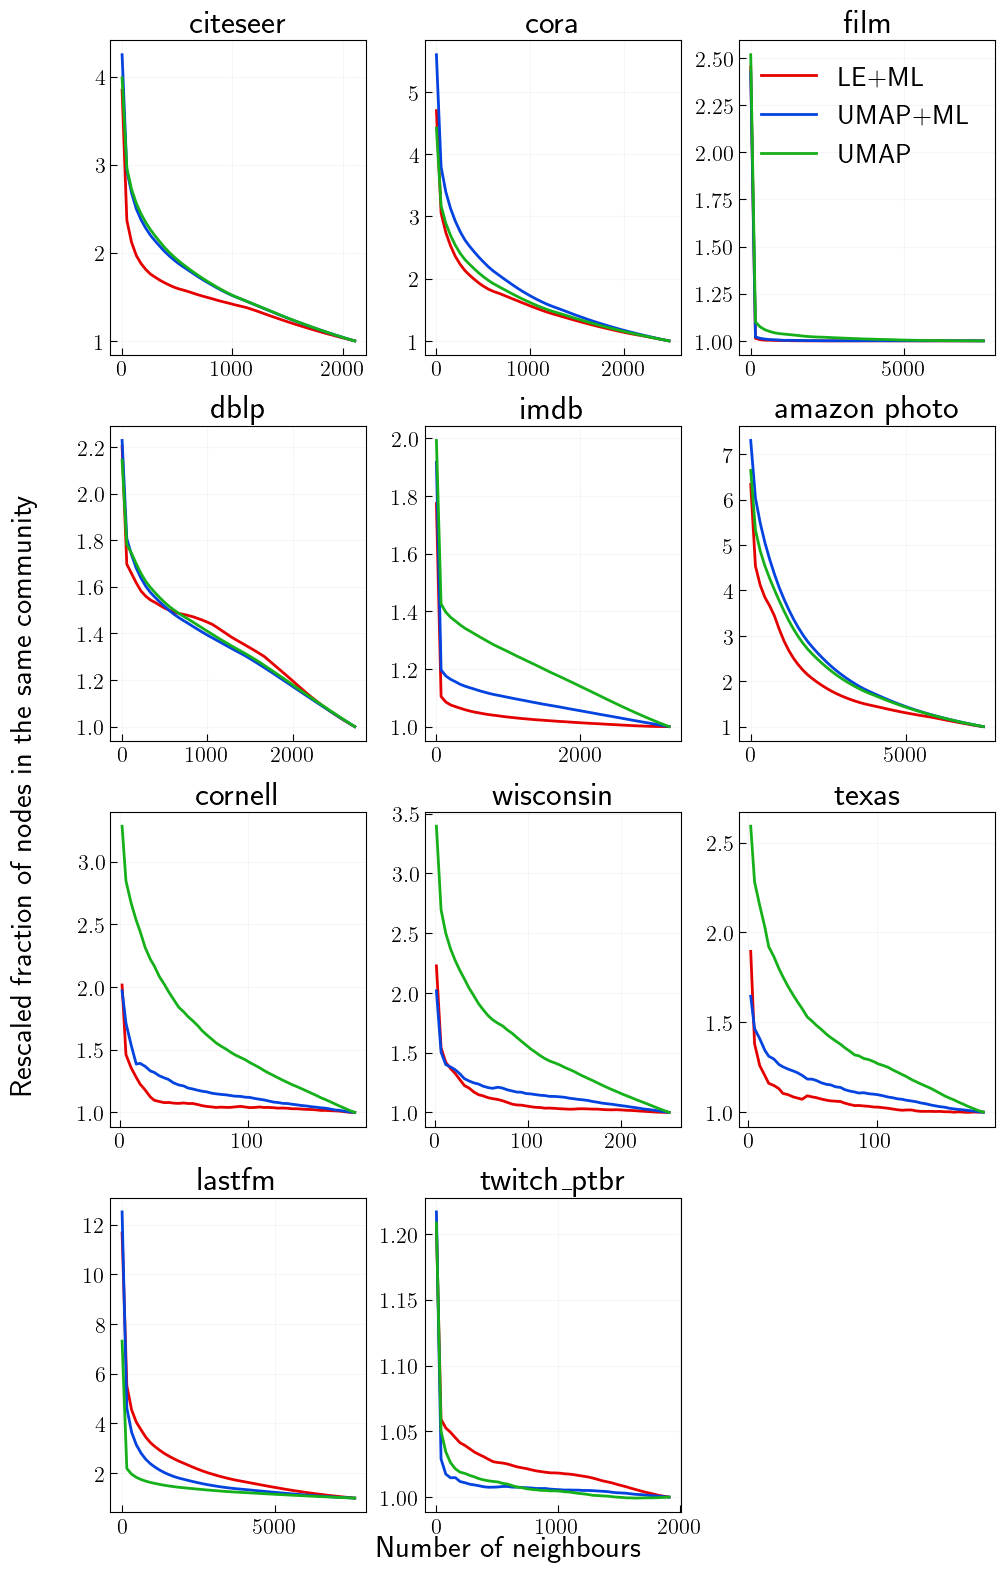

time: 1.33 s (started: 2023-03-27 11:20:13 +02:00)


In [50]:
def plot_fraction_of_nodes_in_community_per_dataset(cc, title):
    plt.plot(cc['fraction_vs_n_neighbours_le_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_le_ml'].values()], 
             label='LE+ML', color='xkcd:red')
    plt.plot(cc['fraction_vs_n_neighbours_umap_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_umap_ml'].values()], 
             label='UMAP+ML', color='xkcd:blue')
    plt.plot(cc['fraction_vs_n_neighbours_only_umap'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_only_umap'].values()], 
             label='UMAP', color='xkcd:green')
    plt.title(title)
    
    
plt.figure(figsize=(10, 16))

plt.subplot(4, 3, 1)
plot_fraction_of_nodes_in_community_per_dataset(citeseer_cc, 'citeseer')
plt.subplot(4, 3, 2)
plot_fraction_of_nodes_in_community_per_dataset(cora_cc, 'cora')
plt.subplot(4, 3, 3)
plot_fraction_of_nodes_in_community_per_dataset(film_cc, 'film')
plt.legend(loc='upper right', fontsize=20)
plt.subplot(4, 3, 4)
plot_fraction_of_nodes_in_community_per_dataset(dblp_cc, 'dblp')
plt.subplot(4, 3, 5)
plot_fraction_of_nodes_in_community_per_dataset(imdb_cc, 'imdb')
plt.subplot(4, 3, 6)
plot_fraction_of_nodes_in_community_per_dataset(amazon_photo_cc, 'amazon photo')
plt.subplot(4, 3, 7)
plot_fraction_of_nodes_in_community_per_dataset(cornell_cc, 'cornell')
plt.subplot(4, 3, 8)
plot_fraction_of_nodes_in_community_per_dataset(wisconsin_cc, 'wisconsin')
plt.subplot(4, 3, 9)
plot_fraction_of_nodes_in_community_per_dataset(texas_cc, 'texas')
plt.subplot(4, 3, 10)
plot_fraction_of_nodes_in_community_per_dataset(lastfm_cc, 'lastfm')
plt.subplot(4, 3, 11)
plot_fraction_of_nodes_in_community_per_dataset(twitch_ptbr_cc, 'twitch_ptbr')

fig = plt.gcf()
fig.supxlabel(r'Number of neighbours', fontsize=22, y=0.02)
fig.supylabel('Rescaled fraction of nodes in the same community', fontsize=22, x=0)

plt.tight_layout()

In [51]:
def get_community_concentration(cc, df):
    closest_val = min(cc['fraction_vs_n_neighbours_le_ml'].keys(), key=lambda x: abs(x - 0.1*len(df)))
    cc_le_ml = np.mean(cc['fraction_vs_n_neighbours_le_ml'][closest_val])
    cc_umap_ml = np.mean(cc['fraction_vs_n_neighbours_umap_ml'][closest_val])
    cc_only_umap = np.mean(cc['fraction_vs_n_neighbours_only_umap'][closest_val])
    
    C = len(np.unique(df['encoded_label'])) # number of communities
    
    return {
        'cc_le_ml': cc_le_ml / C,
        'cc_umap_ml': cc_umap_ml / C,
        'cc_only_umap': cc_only_umap / C
    }
    

citeseer_cc_0_1 = get_community_concentration(citeseer_cc, citeseer_le_ml)
cora_cc_0_1 = get_community_concentration(cora_cc, cora_le_ml)
film_cc_0_1 = get_community_concentration(film_cc, film_le_ml)
dblp_cc_0_1 = get_community_concentration(dblp_cc, dblp_le_ml)
imdb_cc_0_1 = get_community_concentration(imdb_cc, imdb_le_ml)
amazon_photo_cc_0_1 = get_community_concentration(amazon_photo_cc, amazon_photo_le_ml)
cornell_cc_0_1 = get_community_concentration(cornell_cc, cornell_le_ml)
wisconsin_cc_0_1 = get_community_concentration(wisconsin_cc, wisconsin_le_ml)
texas_cc_0_1 = get_community_concentration(texas_cc, texas_le_ml)
lastfm_cc_0_1 = get_community_concentration(lastfm_cc, lastfm_le_ml)
twitch_ptbr_cc_0_1 = get_community_concentration(twitch_ptbr_cc, twitch_ptbr_le_ml)

time: 18.1 ms (started: 2023-03-27 11:20:15 +02:00)


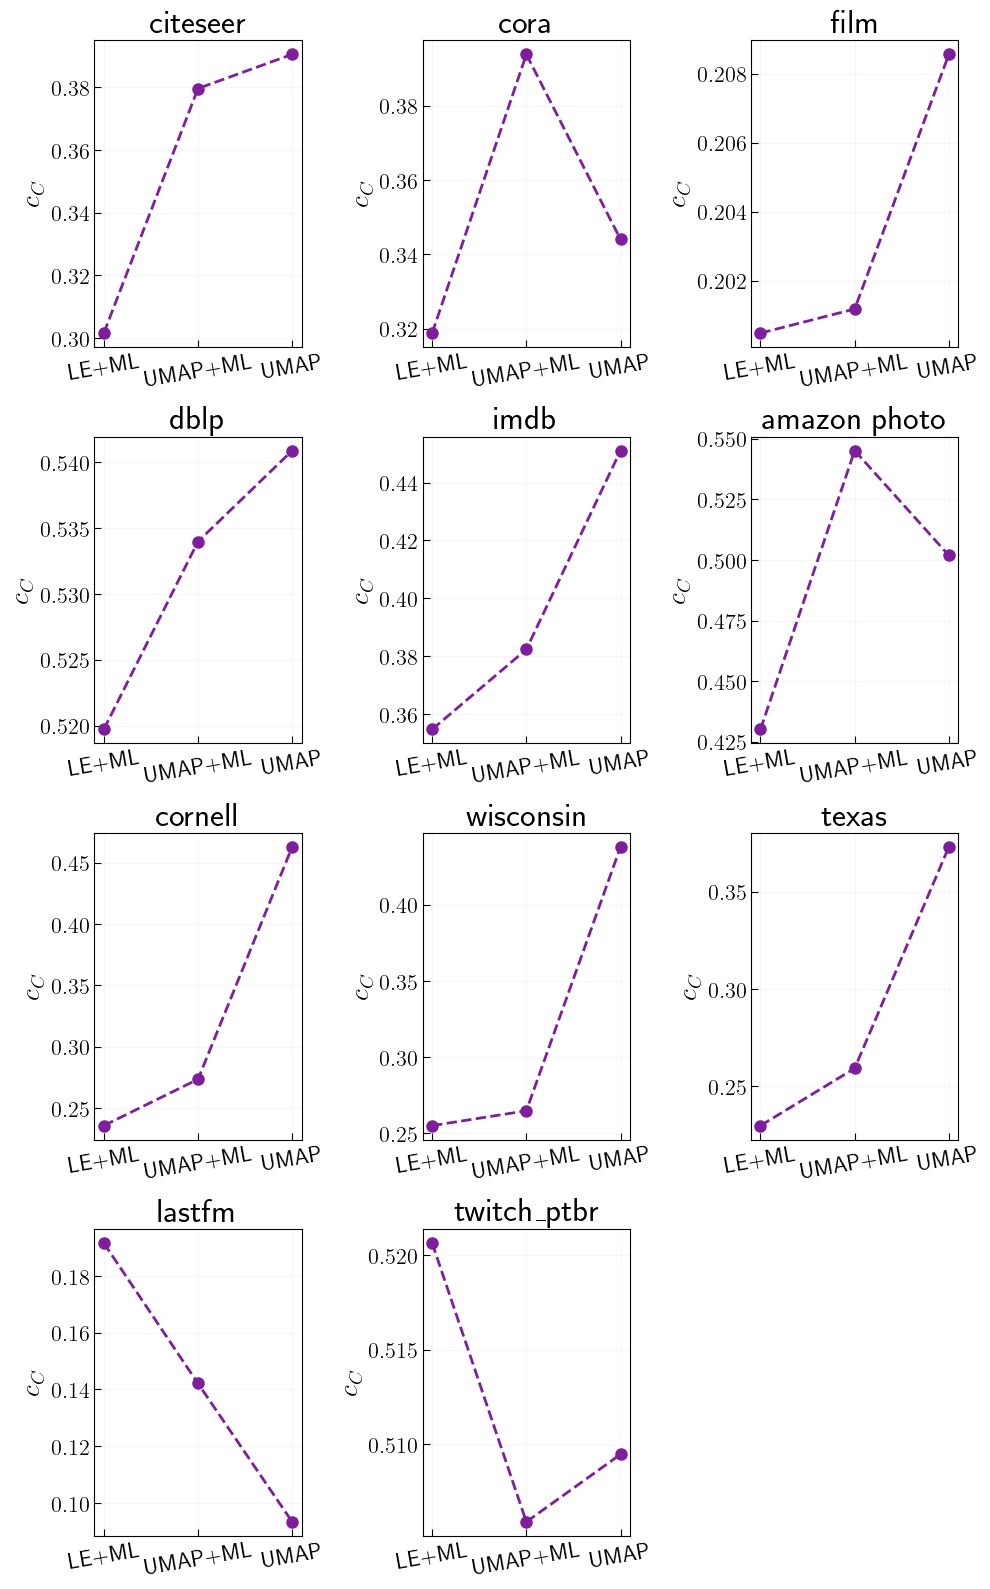

time: 832 ms (started: 2023-03-27 11:20:15 +02:00)


In [52]:
def plot_community_concentration_per_dataset(cc_0_1, title):
    plt.plot([cc_0_1['cc_le_ml'], cc_0_1['cc_umap_ml'], cc_0_1['cc_only_umap']], 
             color='xkcd:purple', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel(r'$c_C$')
    plt.title(title)
    
    
plt.figure(figsize=(10, 16))

plt.subplot(4, 3, 1)
plot_community_concentration_per_dataset(citeseer_cc_0_1, 'citeseer')
plt.subplot(4, 3, 2)
plot_community_concentration_per_dataset(cora_cc_0_1, 'cora')
plt.subplot(4, 3, 3)
plot_community_concentration_per_dataset(film_cc_0_1, 'film')
plt.subplot(4, 3, 4)
plot_community_concentration_per_dataset(dblp_cc_0_1, 'dblp')
plt.subplot(4, 3, 5)
plot_community_concentration_per_dataset(imdb_cc_0_1, 'imdb')
plt.subplot(4, 3, 6)
plot_community_concentration_per_dataset(amazon_photo_cc_0_1, 'amazon photo')
plt.subplot(4, 3, 7)
plot_community_concentration_per_dataset(cornell_cc_0_1, 'cornell')
plt.subplot(4, 3, 8)
plot_community_concentration_per_dataset(wisconsin_cc_0_1, 'wisconsin')
plt.subplot(4, 3, 9)
plot_community_concentration_per_dataset(texas_cc_0_1, 'texas')
plt.subplot(4, 3, 10)
plot_community_concentration_per_dataset(lastfm_cc_0_1, 'lastfm')
plt.subplot(4, 3, 11)
plot_community_concentration_per_dataset(twitch_ptbr_cc_0_1, 'twitch_ptbr')


plt.tight_layout()

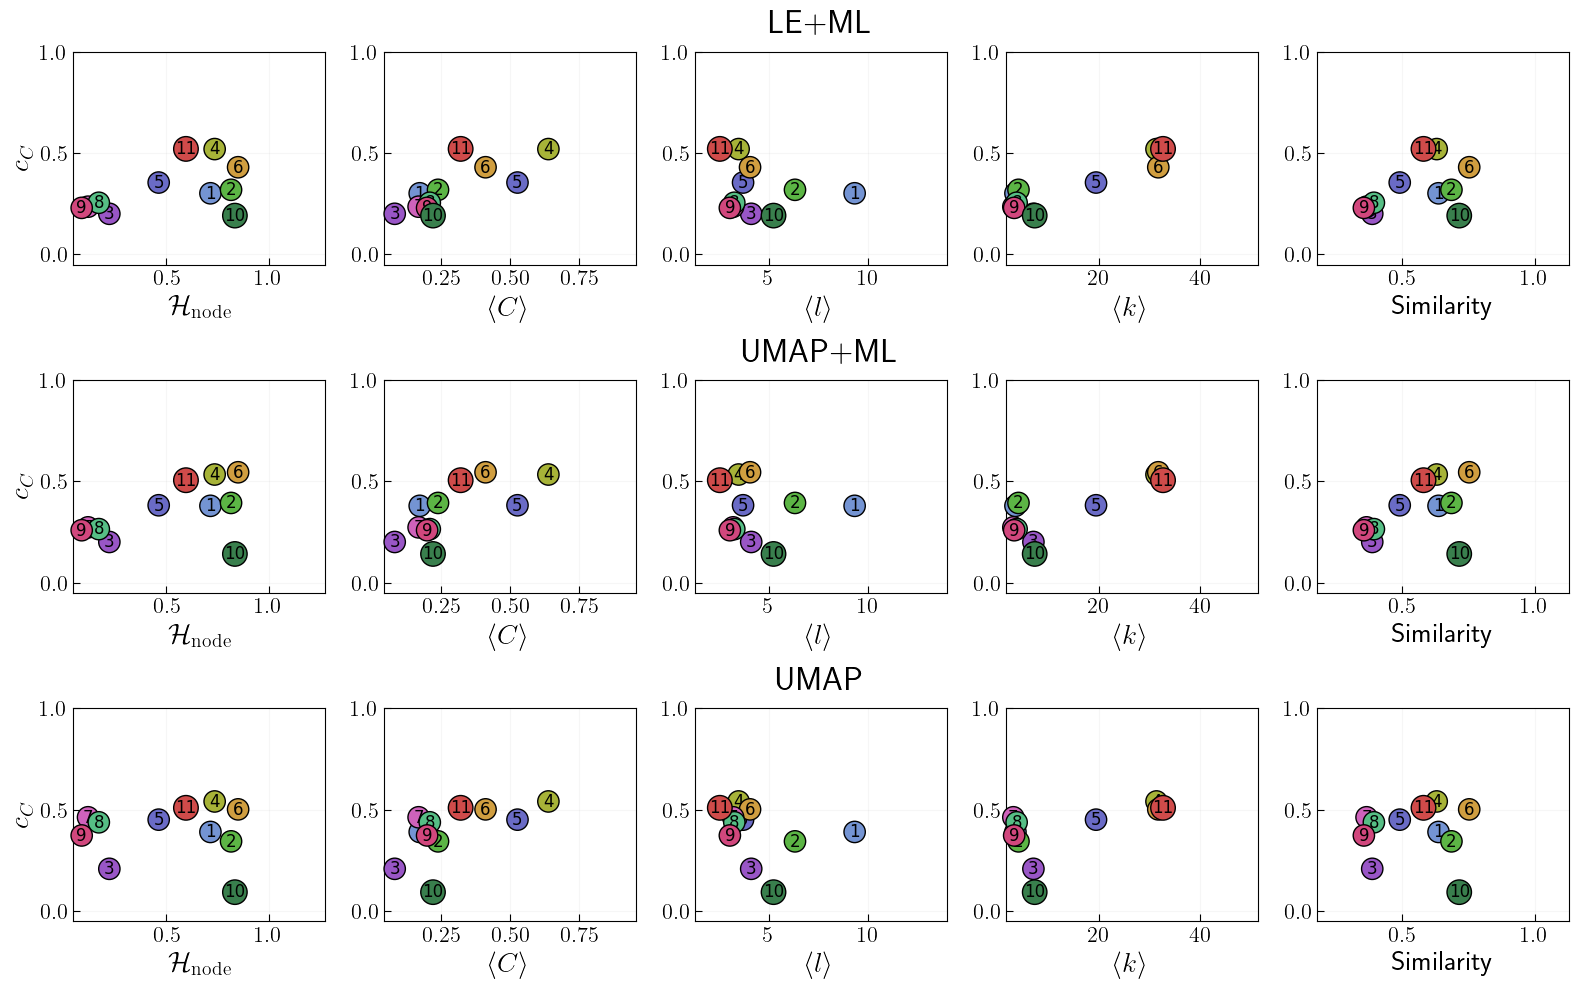

time: 1.71 s (started: 2023-03-27 11:20:15 +02:00)


In [53]:
cc_le_ml = np.array([
    citeseer_cc_0_1['cc_le_ml'],
    cora_cc_0_1['cc_le_ml'],
    film_cc_0_1['cc_le_ml'],
    dblp_cc_0_1['cc_le_ml'],
    imdb_cc_0_1['cc_le_ml'],
    amazon_photo_cc_0_1['cc_le_ml'],
    cornell_cc_0_1['cc_le_ml'],
    wisconsin_cc_0_1['cc_le_ml'],
    texas_cc_0_1['cc_le_ml'],
    lastfm_cc_0_1['cc_le_ml'],
    twitch_ptbr_cc_0_1['cc_le_ml'],
])

cc_umap_ml = np.array([
    citeseer_cc_0_1['cc_umap_ml'],
    cora_cc_0_1['cc_umap_ml'],
    film_cc_0_1['cc_umap_ml'],
    dblp_cc_0_1['cc_umap_ml'],
    imdb_cc_0_1['cc_umap_ml'],
    amazon_photo_cc_0_1['cc_umap_ml'],
    cornell_cc_0_1['cc_umap_ml'],
    wisconsin_cc_0_1['cc_umap_ml'],
    texas_cc_0_1['cc_umap_ml'],
    lastfm_cc_0_1['cc_umap_ml'],
    twitch_ptbr_cc_0_1['cc_umap_ml'],
])

cc_only_umap = np.array([
    citeseer_cc_0_1['cc_only_umap'],
    cora_cc_0_1['cc_only_umap'],
    film_cc_0_1['cc_only_umap'],
    dblp_cc_0_1['cc_only_umap'],
    imdb_cc_0_1['cc_only_umap'],
    amazon_photo_cc_0_1['cc_only_umap'],
    cornell_cc_0_1['cc_only_umap'],
    wisconsin_cc_0_1['cc_only_umap'],
    texas_cc_0_1['cc_only_umap'],
    lastfm_cc_0_1['cc_only_umap'],
    twitch_ptbr_cc_0_1['cc_only_umap'],
])


def plot_cc_per_option(cc_res, col):
    datasets = list(range(1, 15))
    for gr, h, c, name in zip(cc_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 1)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_cc_all_options_per_type(cc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_cc_per_option(cc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$c_C$')

    plt.subplot(3, 5, i+1)
    plot_cc_per_option(cc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_cc_per_option(cc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_cc_per_option(cc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_cc_per_option(cc_res, 'similarity')
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_cc_all_options_per_type(cc_le_ml, 'LE+ML', i=1)
plot_cc_all_options_per_type(cc_umap_ml, 'UMAP+ML', i=6)
plot_cc_all_options_per_type(cc_only_umap, 'UMAP', i=11)
plt.tight_layout()


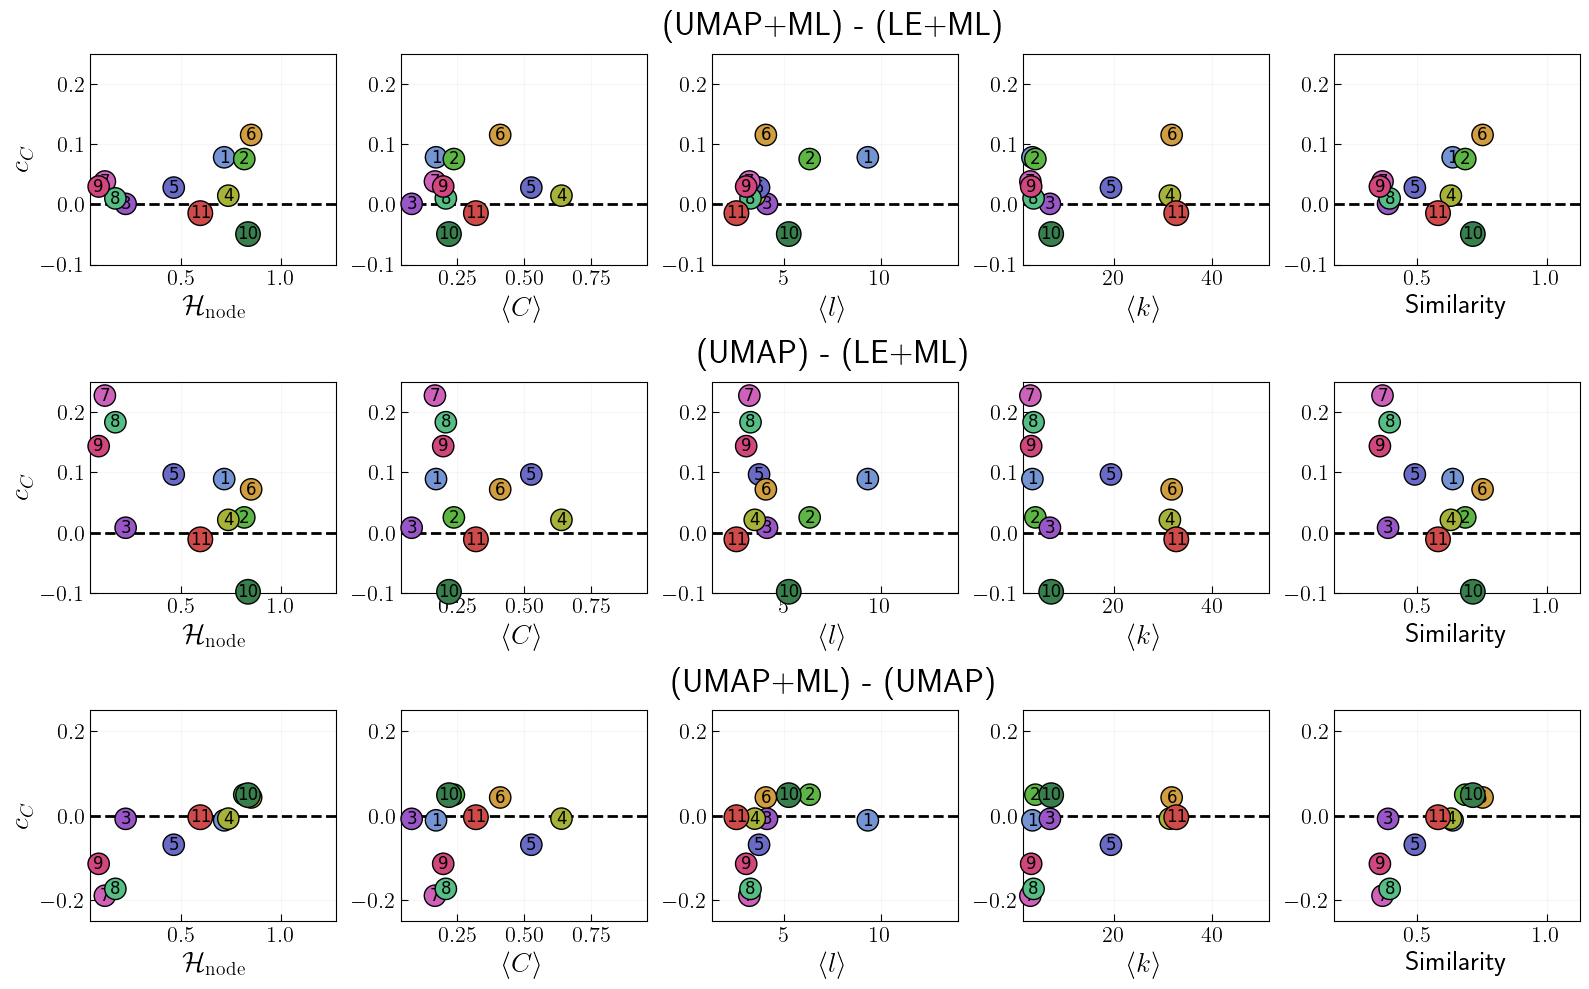

time: 1.52 s (started: 2023-03-27 11:20:17 +02:00)


In [54]:
def plot_cc_all_options_difference(cc_res, title, ymin=-0.1, ymax=0.25, i=1):
    plt.subplot(3, 5, i)
    plot_cc_per_option(cc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$c_C$')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_cc_per_option(cc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_cc_per_option(cc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_cc_per_option(cc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_cc_per_option(cc_res, 'similarity')
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_cc_all_options_difference(cc_umap_ml - cc_le_ml, title='(UMAP+ML) - (LE+ML)', i=1)
plot_cc_all_options_difference(cc_only_umap - cc_le_ml, title='(UMAP) - (LE+ML)', i=6)
plot_cc_all_options_difference(cc_umap_ml - cc_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.25)

plt.tight_layout()


## Link prediction -- precision curve (from complete graphs)

In [19]:
from generate_incomplete_graph import *
from compute_precision_vs_missing_links import *
from numba import jit


def read_beta_and_mu(path):
    with open(path, 'r') as f:
        for line in f:
            if '- beta' in line:
                beta = float(line.split()[-1])
            elif '- mu' in line:
                mu = float(line.split()[-1])
        return beta, mu

    
@jit(nopython=True)
def fast_score_matrix(pos, kappas, beta, mu, R):
    score = np.zeros((len(kappas), len(kappas)))
    for i in range(len(pos)):
        for j in range(i):
            p1, p2 = pos[i], pos[j]
            angle = np.arccos(np.dot(p1, p2) / (np.linalg.norm(p2) * np.linalg.norm(p1)))
            if np.isnan(angle):
                angle = 0
            score[i, j] = 1 / (1 + np.power((R * angle) / np.sqrt(mu * kappas[i] * kappas[j]), beta))
            score[j, i] = score[i, j]
    return score


def compute_score_matrix(g, df, beta, mu):
    nodes_order = list(g.nodes())
    df['index'] = df['index'].astype(str)
    df = df.set_index('index')
    df = df.loc[nodes_order]
    
    pos = df[['p1', 'p2', 'p3']].values
    R = np.mean(np.linalg.norm(pos, axis=1))
    kappas = df['kappa'].values
    return fast_score_matrix(pos, kappas, beta, mu, R)


def compute_precision_curve_complete_graph(qs, df, complete_graph, beta, mu, ntimes=5):
    score = compute_score_matrix(complete_graph, df, beta, mu)
    precisions = []
    for q in tqdm(qs):
        p_mean = []
        for _ in range(ntimes):
            train_graph = generate_incomplete_network(complete_graph, q0=q, check_gcc=False)
            ET = nx.to_numpy_matrix(train_graph)
            EP = nx.to_numpy_matrix(complete_graph) - ET
            L = int(q * nx.number_of_edges(complete_graph))
            p = compute_precision(ET, EP, L, score)
            p_mean.append(p)
        precisions.append(np.mean(p_mean))
    return precisions


qs = np.linspace(0.01, 0.8, num=10)

time: 602 ms (started: 2024-01-11 15:17:13 +01:00)


In [32]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord")

citeseer_le_ml_pr = compute_precision_curve_complete_graph(qs, citeseer_le_ml, citeseer_graph, beta_le_ml, mu_le_ml)
citeseer_umap_ml_pr = compute_precision_curve_complete_graph(qs, citeseer_umap_ml, citeseer_graph, beta_umap_ml, mu_umap_ml)
citeseer_only_umap_pr = compute_precision_curve_complete_graph(qs, citeseer_only_umap, citeseer_graph, beta_only_umap, mu_only_umap)

/tmp/ipykernel_2151235/3263662927.py:22: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  angle = np.arccos(np.dot(p1, p2) / (np.linalg.norm(p2) * np.linalg.norm(p1)))
/tmp/ipykernel_2151235/3263662927.py:22: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  angle = np.arccos(np.dot(p1, p2) / (np.linalg.norm(p2) * np.linalg.norm(p1)))
100%|██████████| 10/10 [17:14<00:00, 103.46s/it]

time: 3h 49min 36s (started: 2023-03-31 11:54:44 +02:00)


In [33]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/cora_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/cora_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/cora_GC.inf_coord")

cora_le_ml_pr = compute_precision_curve_complete_graph(qs, cora_le_ml, cora_graph, beta_le_ml, mu_le_ml)
cora_umap_ml_pr = compute_precision_curve_complete_graph(qs, cora_umap_ml, cora_graph, beta_umap_ml, mu_umap_ml)
cora_only_umap_pr = compute_precision_curve_complete_graph(qs, cora_only_umap, cora_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [64:50:34<00:00, 23343.44s/it]    

time: 2d 18h 5min 42s (started: 2023-03-31 15:44:21 +02:00)


In [ ]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

# film_le_ml_pr = compute_precision_curve_complete_graph(qs, film_le_ml, film_graph, beta_le_ml, mu_le_ml)
# film_umap_ml_pr = compute_precision_curve_complete_graph(qs, film_umap_ml, film_graph, beta_umap_ml, mu_umap_ml)
# film_only_umap_pr = compute_precision_curve_complete_graph(qs, film_only_umap, film_graph, beta_only_umap, mu_only_umap)

  0%|          | 0/10 [00:00<?, ?it/s]

In [34]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord")

dblp_le_ml_pr = compute_precision_curve_complete_graph(qs, dblp_le_ml, dblp_graph, beta_le_ml, mu_le_ml)
dblp_umap_ml_pr = compute_precision_curve_complete_graph(qs, dblp_umap_ml, dblp_graph, beta_umap_ml, mu_umap_ml)
dblp_only_umap_pr = compute_precision_curve_complete_graph(qs, dblp_only_umap, dblp_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [36:08<00:00, 216.86s/it] 

time: 2h 2min 50s (started: 2023-04-03 09:50:03 +02:00)


In [35]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/imdb_mam_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/imdb_mam_GC.inf_coord")

imdb_le_ml_pr = compute_precision_curve_complete_graph(qs, imdb_le_ml, imdb_graph, beta_le_ml, mu_le_ml)
imdb_umap_ml_pr = compute_precision_curve_complete_graph(qs, imdb_umap_ml, imdb_graph, beta_umap_ml, mu_umap_ml)
imdb_only_umap_pr = compute_precision_curve_complete_graph(qs, imdb_only_umap, imdb_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [25:36<00:00, 153.65s/it]

time: 1h 27min 17s (started: 2023-04-03 11:52:53 +02:00)


In [36]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/amazon_photo_GC.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/amazon_photo_GC.inf_coord")

amazon_photo_le_ml_pr = compute_precision_curve_complete_graph(qs, amazon_photo_le_ml, amazon_photo_graph, beta_le_ml, mu_le_ml)
amazon_photo_umap_ml_pr = compute_precision_curve_complete_graph(qs, amazon_photo_umap_ml, amazon_photo_graph, beta_umap_ml, mu_umap_ml)
amazon_photo_only_umap_pr = compute_precision_curve_complete_graph(qs, amazon_photo_only_umap, amazon_photo_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [7:54:52<00:00, 2849.24s/it] 

time: 1d 7h 48min 33s (started: 2023-04-03 13:20:11 +02:00)


In [120]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

cornell_le_ml_pr = compute_precision_curve_complete_graph(qs, cornell_le_ml, cornell_graph, beta_le_ml, mu_le_ml)
cornell_umap_ml_pr = compute_precision_curve_complete_graph(qs, cornell_umap_ml, cornell_graph, beta_umap_ml, mu_umap_ml)
cornell_only_umap_pr = compute_precision_curve_complete_graph(qs, cornell_only_umap, cornell_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 36.04it/s]

time: 811 ms (started: 2023-04-24 09:26:30 +02:00)


In [38]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

wisconsin_le_ml_pr = compute_precision_curve_complete_graph(qs, wisconsin_le_ml, wisconsin_graph, beta_le_ml, mu_le_ml)
wisconsin_umap_ml_pr = compute_precision_curve_complete_graph(qs, wisconsin_umap_ml, wisconsin_graph, beta_umap_ml, mu_umap_ml)
wisconsin_only_umap_pr = compute_precision_curve_complete_graph(qs, wisconsin_only_umap, wisconsin_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 31.45it/s]

time: 998 ms (started: 2023-04-04 21:08:45 +02:00)


In [121]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/out1_graph_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/out1_graph_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/out1_graph_edges.inf_coord")

texas_le_ml_pr = compute_precision_curve_complete_graph(qs, texas_le_ml, texas_graph, beta_le_ml, mu_le_ml)
texas_umap_ml_pr = compute_precision_curve_complete_graph(qs, texas_umap_ml, texas_graph, beta_umap_ml, mu_umap_ml)
texas_only_umap_pr = compute_precision_curve_complete_graph(qs, texas_only_umap, texas_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [00:00<00:00, 50.83it/s]

time: 638 ms (started: 2023-04-24 09:26:31 +02:00)


In [40]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord")

lastfm_le_ml_pr = compute_precision_curve_complete_graph(qs, lastfm_le_ml, lastfm_graph, beta_le_ml, mu_le_ml)
lastfm_umap_ml_pr = compute_precision_curve_complete_graph(qs, lastfm_umap_ml, lastfm_graph, beta_umap_ml, mu_umap_ml)
lastfm_only_umap_pr = compute_precision_curve_complete_graph(qs, lastfm_only_umap, lastfm_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [1:58:31<00:00, 711.13s/it] 


time: 6d 16h 35min 46s (started: 2023-04-04 21:08:46 +02:00)


In [41]:
base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
beta_le_ml, mu_le_ml = read_beta_and_mu(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord")
beta_umap_ml, mu_umap_ml = read_beta_and_mu(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord")
beta_only_umap, mu_only_umap = read_beta_and_mu(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord")

twitch_ptbr_le_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_le_ml, twitch_ptbr_graph, beta_le_ml, mu_le_ml)
twitch_ptbr_umap_ml_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_umap_ml, twitch_ptbr_graph, beta_umap_ml, mu_umap_ml)
twitch_ptbr_only_umap_pr = compute_precision_curve_complete_graph(qs, twitch_ptbr_only_umap, twitch_ptbr_graph, beta_only_umap, mu_only_umap)

100%|██████████| 10/10 [01:38<00:00,  9.83s/it]

time: 5min 20s (started: 2023-04-11 13:44:33 +02:00)


In [54]:
# import pickle

# base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/link_prediction_results/"

# def save_link_prediction_results(res_le_ml, res_umap_ml, res_only_umap, name):
#     with open(f"{base_path}/precision_1ML_{name}_le_ml.dat", 'wb') as f:
#         pickle.dump(res_le_ml, f)
#     with open(f"{base_path}/precision_1ML_{name}_umap_ml.dat", 'wb') as f:
#         pickle.dump(res_umap_ml, f)
#     with open(f"{base_path}/precision_1ML_{name}_only_umap.dat", 'wb') as f:
#         pickle.dump(res_only_umap, f)

        
# save_link_prediction_results(citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_only_umap_pr, 'citeseer')
# save_link_prediction_results(cora_le_ml_pr, cora_umap_ml_pr, cora_only_umap_pr, 'cora')
# save_link_prediction_results(film_le_ml_pr, film_umap_ml_pr, film_only_umap_pr, 'film')
# save_link_prediction_results(dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr, 'dblp')
# save_link_prediction_results(imdb_le_ml_pr, imdb_umap_ml_pr, imdb_only_umap_pr, 'imdb')
# save_link_prediction_results(amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr, 'amazon_photo')
# save_link_prediction_results(cornell_le_ml_pr, cornell_umap_ml_pr, cornell_only_umap_pr, 'cornell')
# save_link_prediction_results(wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr, 'wisconsin')
# save_link_prediction_results(texas_le_ml_pr, texas_umap_ml_pr, texas_only_umap_pr, 'texas')
# save_link_prediction_results(lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr, 'lastfm')
# save_link_prediction_results(twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr, 'twitch_ptbr')

time: 1.3 ms (started: 2023-04-17 08:54:51 +02:00)


In [20]:
import pickle

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/link_prediction_results/"

def load_link_prediction_results(name):
    with open(f"{base_path}/precision_1ML_{name}_le_ml.dat", 'rb') as f:
        res_le_ml = pickle.load(f)
    with open(f"{base_path}/precision_1ML_{name}_umap_ml.dat", 'rb') as f:
        res_umap_ml = pickle.load(f)
    with open(f"{base_path}/precision_1ML_{name}_random_ml.dat", 'rb') as f:
        res_random_ml = pickle.load(f)
    with open(f"{base_path}/precision_1ML_{name}_only_umap.dat", 'rb') as f:
        res_only_umap = pickle.load(f)
    return res_le_ml, res_umap_ml, res_random_ml, res_only_umap
        
citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_random_ml_pr, citeseer_only_umap_pr = load_link_prediction_results('citeseer')
cora_le_ml_pr, cora_umap_ml_pr, cora_random_ml_pr, cora_only_umap_pr = load_link_prediction_results('cora')
dblp_le_ml_pr, dblp_umap_ml_pr, dblp_random_ml_pr, dblp_only_umap_pr = load_link_prediction_results('dblp')
imdb_le_ml_pr, imdb_umap_ml_pr, imdb_random_ml_pr, imdb_only_umap_pr = load_link_prediction_results('imdb')
amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_random_ml_pr, amazon_photo_only_umap_pr = load_link_prediction_results('amazon_photo')
cornell_le_ml_pr, cornell_umap_ml_pr, cornell_random_ml_pr, cornell_only_umap_pr = load_link_prediction_results('cornell')
wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_random_ml_pr, wisconsin_only_umap_pr = load_link_prediction_results('wisconsin')
texas_le_ml_pr, texas_umap_ml_pr, texas_random_ml_pr, texas_only_umap_pr = load_link_prediction_results('texas')
lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_random_ml_pr, lastfm_only_umap_pr = load_link_prediction_results('lastfm')
twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_random_ml_pr, twitch_ptbr_only_umap_pr = load_link_prediction_results('twitch_ptbr')

time: 20.6 ms (started: 2024-01-11 15:17:20 +01:00)


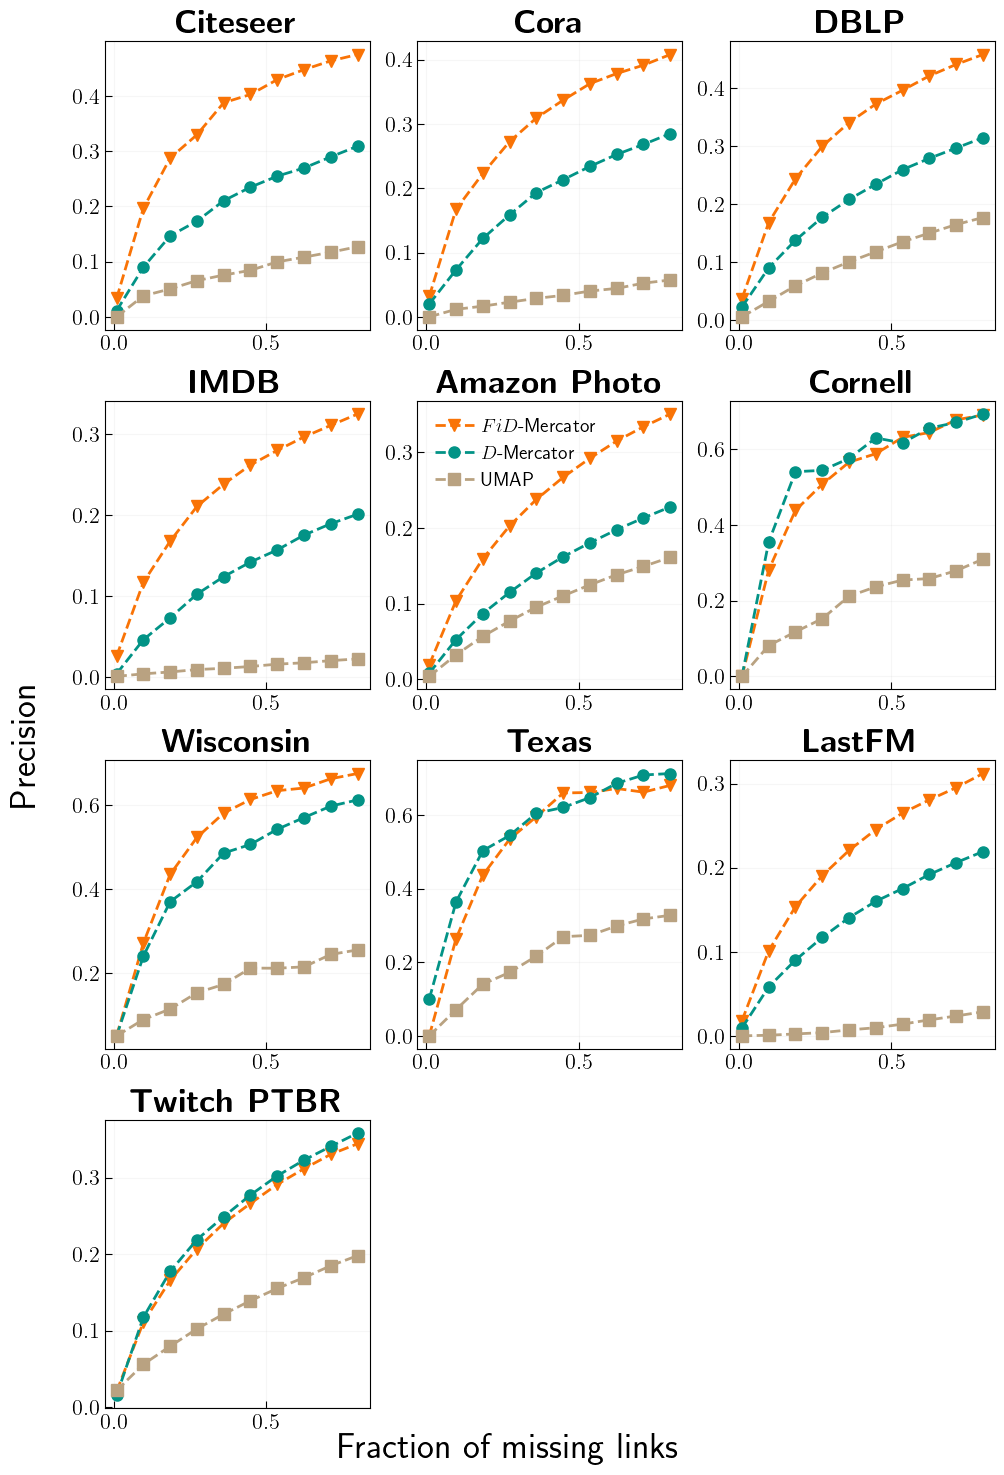

time: 1.58 s (started: 2024-01-11 15:17:47 +01:00)


In [22]:
def plot_precision_curve_per_dataset(qs, le_ml_pr, umap_ml_pr, only_umap_pr, title):
    plt.plot(qs, umap_ml_pr, 'v--', label=r'$FiD$-Mercator', color='xkcd:orange')
    plt.plot(qs, le_ml_pr, 'o--', label='$D$-Mercator', color='xkcd:teal')
    plt.plot(qs, only_umap_pr, 's--', label='UMAP', color='xkcd:taupe')
    plt.title(title)
    
    
plt.figure(figsize=(10, 15))
plt.subplot(4, 3, 1)
plot_precision_curve_per_dataset(qs, citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_only_umap_pr, r'\textbf{Citeseer}')
plt.subplot(4, 3, 2)
plot_precision_curve_per_dataset(qs, cora_le_ml_pr, cora_umap_ml_pr, cora_only_umap_pr, r'\textbf{Cora}')
plt.subplot(4, 3, 3)
plot_precision_curve_per_dataset(qs, dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr, r'\textbf{DBLP}')
plt.subplot(4, 3, 4)
plot_precision_curve_per_dataset(qs, imdb_le_ml_pr, imdb_umap_ml_pr, imdb_only_umap_pr, r'\textbf{IMDB}')
plt.subplot(4, 3, 5)
plot_precision_curve_per_dataset(qs, amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr, r'\textbf{Amazon Photo}')
plt.legend(fontsize=14, handletextpad=0.4)
plt.subplot(4, 3, 6)
plot_precision_curve_per_dataset(qs, cornell_le_ml_pr, cornell_umap_ml_pr, cornell_only_umap_pr, r'\textbf{Cornell}')
plt.subplot(4, 3, 7)
plot_precision_curve_per_dataset(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr, r'\textbf{Wisconsin}')
plt.subplot(4, 3, 8)
plot_precision_curve_per_dataset(qs, texas_le_ml_pr, texas_umap_ml_pr, texas_only_umap_pr, r'\textbf{Texas}')
plt.subplot(4, 3, 9)
plot_precision_curve_per_dataset(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr, r'\textbf{LastFM}')
plt.subplot(4, 3, 10)
plot_precision_curve_per_dataset(qs, twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr, r'\textbf{Twitch PTBR}')

fig = plt.gcf()
fig.supxlabel('Fraction of missing links', fontsize=26, y=0.02)
fig.supylabel('Precision', fontsize=26, x=0)

plt.tight_layout()

# plt.suptitle(r"1 $\times$ ML", y=1.03, fontsize=26)
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/node-classification-labels-cC-link-prediction-17-04-23/plots/link_prediction_1ML.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/figures-publication-and-random-initialization-27-04-23/plots/link_prediction_1ML.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/SI/plots/link_prediction_1ML_new_colors.pdf")


Text(0.5, 0, 'Fraction of missing links')

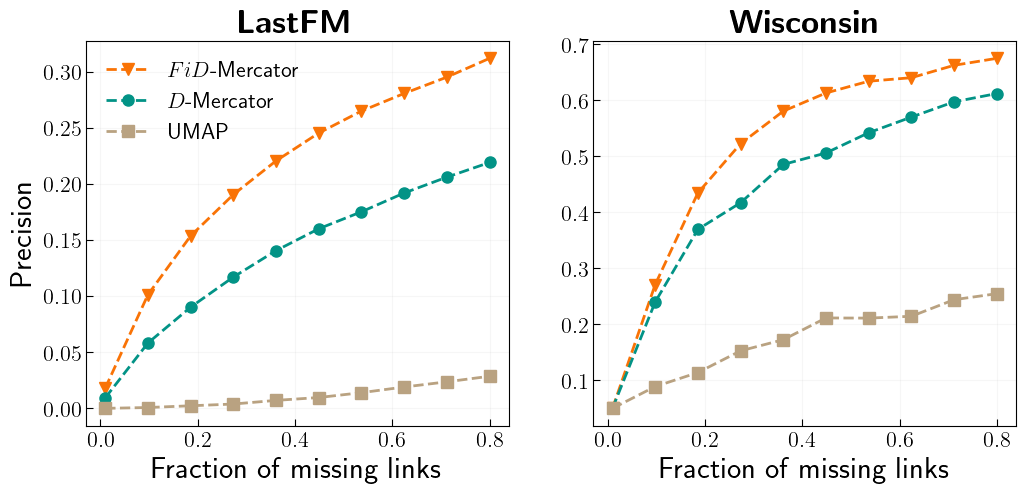

time: 675 ms (started: 2024-01-11 15:18:00 +01:00)


In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_precision_curve_per_dataset(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr, r'\textbf{LastFM}')
plt.ylabel('Precision', fontsize=22)
plt.xlabel('Fraction of missing links', fontsize=22)
plt.legend()

plt.subplot(1, 2, 2)
plot_precision_curve_per_dataset(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr, r'\textbf{Wisconsin}')
plt.xlabel('Fraction of missing links', fontsize=22)

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/node-classification-link-prediction-with-random-case-21-04-23/plots/lastfm_wisconsin_link_prediction_1ML.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/figures-publication-and-random-initialization-27-04-23/plots/lastfm_wisconsin_link_prediction_1ML.pdf")


Text(0.5, 1.0, '')

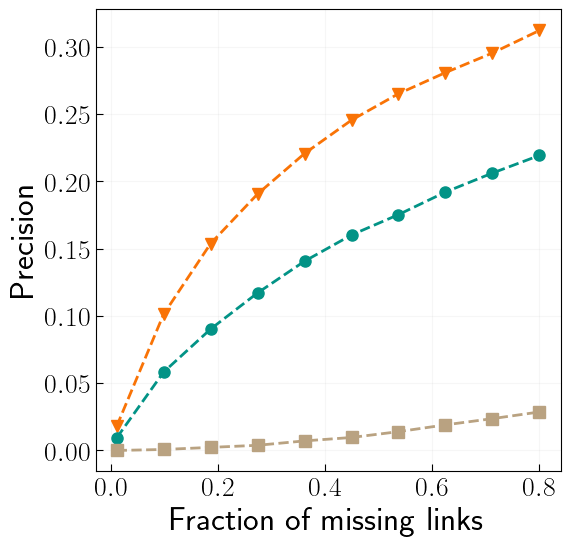

time: 204 ms (started: 2024-01-11 15:18:05 +01:00)


In [24]:
plt.figure(figsize=(6, 6))
plot_precision_curve_per_dataset(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr, r'\textbf{LastFM}')
plt.ylabel('Precision', fontsize=24)
plt.xlabel('Fraction of missing links', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.legend()
plt.title("")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/lastfm_link_prediction.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/lastfm_link_prediction_new_colors.pdf")

Text(0.5, 1.0, '')

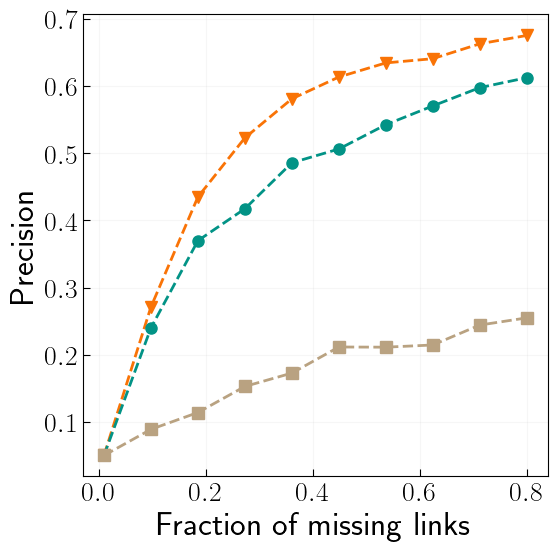

time: 196 ms (started: 2024-01-11 15:18:28 +01:00)


In [26]:
plt.figure(figsize=(6, 6))
plot_precision_curve_per_dataset(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr, r'\textbf{Wisconsin}')

plt.ylabel('Precision', fontsize=24)
plt.xlabel('Fraction of missing links', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend()

plt.title("")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/wisconsin_link_prediction.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/wisconsin_link_prediction_new_colors.pdf")

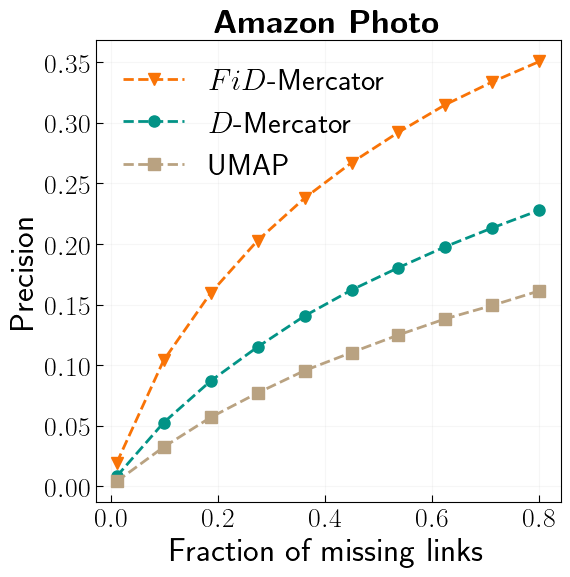

time: 657 ms (started: 2024-01-11 15:19:59 +01:00)


In [29]:
plt.figure(figsize=(6, 6))
plot_precision_curve_per_dataset(qs, amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr, r'\textbf{Amazon Photo}')
plt.ylabel('Precision', fontsize=24)
plt.xlabel('Fraction of missing links', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=22)
# plt.title("")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/amazon_photo_link_prediction.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper1/plots/amazon_photo_link_prediction_new_colors.pdf")


# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper/plots/fig3_amazon_photo_link_prediction.pdf")


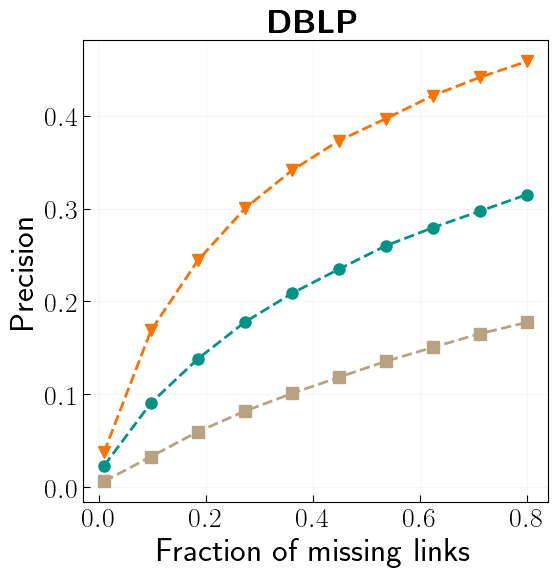

time: 389 ms (started: 2024-01-11 15:20:52 +01:00)


In [32]:
plt.figure(figsize=(6, 6))
plot_precision_curve_per_dataset(qs, dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr, r'\textbf{DBLP}')
plt.ylabel('Precision', fontsize=24)
plt.xlabel('Fraction of missing links', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper/plots/fig3_dblp_link_prediction.pdf")


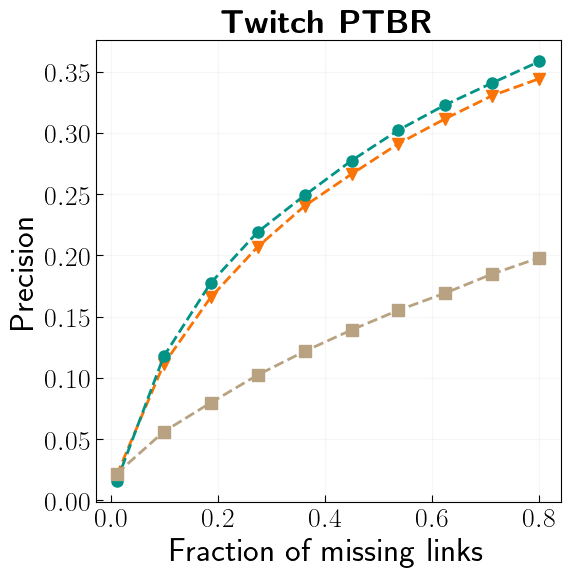

time: 479 ms (started: 2024-01-11 15:26:23 +01:00)


In [34]:
plt.figure(figsize=(6, 6))
plot_precision_curve_per_dataset(qs, twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr, r'\textbf{Twitch PTBR}')
plt.ylabel('Precision', fontsize=24)
plt.xlabel('Fraction of missing links', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Paper/plots/fig3_twitch_link_prediction.pdf")


In [23]:
qs

array([0.01      , 0.09777778, 0.18555556, 0.27333333, 0.36111111,
       0.44888889, 0.53666667, 0.62444444, 0.71222222, 0.8       ])

time: 2.13 ms (started: 2023-05-11 10:28:52 +02:00)


In [13]:
def get_precision_for_missing_link_fraction(qs, le_ml_pr, umap_ml_pr, only_umap_pr, q=0.26):
    idx = np.where(np.isclose(qs, q, rtol=0.08))[0][0]
    return {
        'pr_le_ml': le_ml_pr[idx],
        'pr_umap_ml': umap_ml_pr[idx],
        'pr_only_umap': only_umap_pr[idx]
    }


citeseer_pr = get_precision_for_missing_link_fraction(qs, citeseer_le_ml_pr, citeseer_umap_ml_pr, citeseer_only_umap_pr)
cora_pr = get_precision_for_missing_link_fraction(qs, cora_le_ml_pr, cora_umap_ml_pr, cora_only_umap_pr)
#film_pr = get_precision_for_missing_link_fraction(qs, film_le_ml_pr, film_umap_ml_pr, film_only_umap_pr)
dblp_pr = get_precision_for_missing_link_fraction(qs, dblp_le_ml_pr, dblp_umap_ml_pr, dblp_only_umap_pr)
imdb_pr = get_precision_for_missing_link_fraction(qs, imdb_le_ml_pr, imdb_umap_ml_pr, imdb_only_umap_pr)
amazon_photo_pr = get_precision_for_missing_link_fraction(qs, amazon_photo_le_ml_pr, amazon_photo_umap_ml_pr, amazon_photo_only_umap_pr)
cornell_pr = get_precision_for_missing_link_fraction(qs, cornell_le_ml_pr, cornell_umap_ml_pr, cornell_only_umap_pr)
wisconsin_pr = get_precision_for_missing_link_fraction(qs, wisconsin_le_ml_pr, wisconsin_umap_ml_pr, wisconsin_only_umap_pr)
texas_pr = get_precision_for_missing_link_fraction(qs, texas_le_ml_pr, texas_umap_ml_pr, texas_only_umap_pr)
lastfm_pr = get_precision_for_missing_link_fraction(qs, lastfm_le_ml_pr, lastfm_umap_ml_pr, lastfm_only_umap_pr)
twitch_ptbr_pr = get_precision_for_missing_link_fraction(qs, twitch_ptbr_le_ml_pr, twitch_ptbr_umap_ml_pr, twitch_ptbr_only_umap_pr)


time: 2.38 ms (started: 2023-12-11 12:06:45 +01:00)


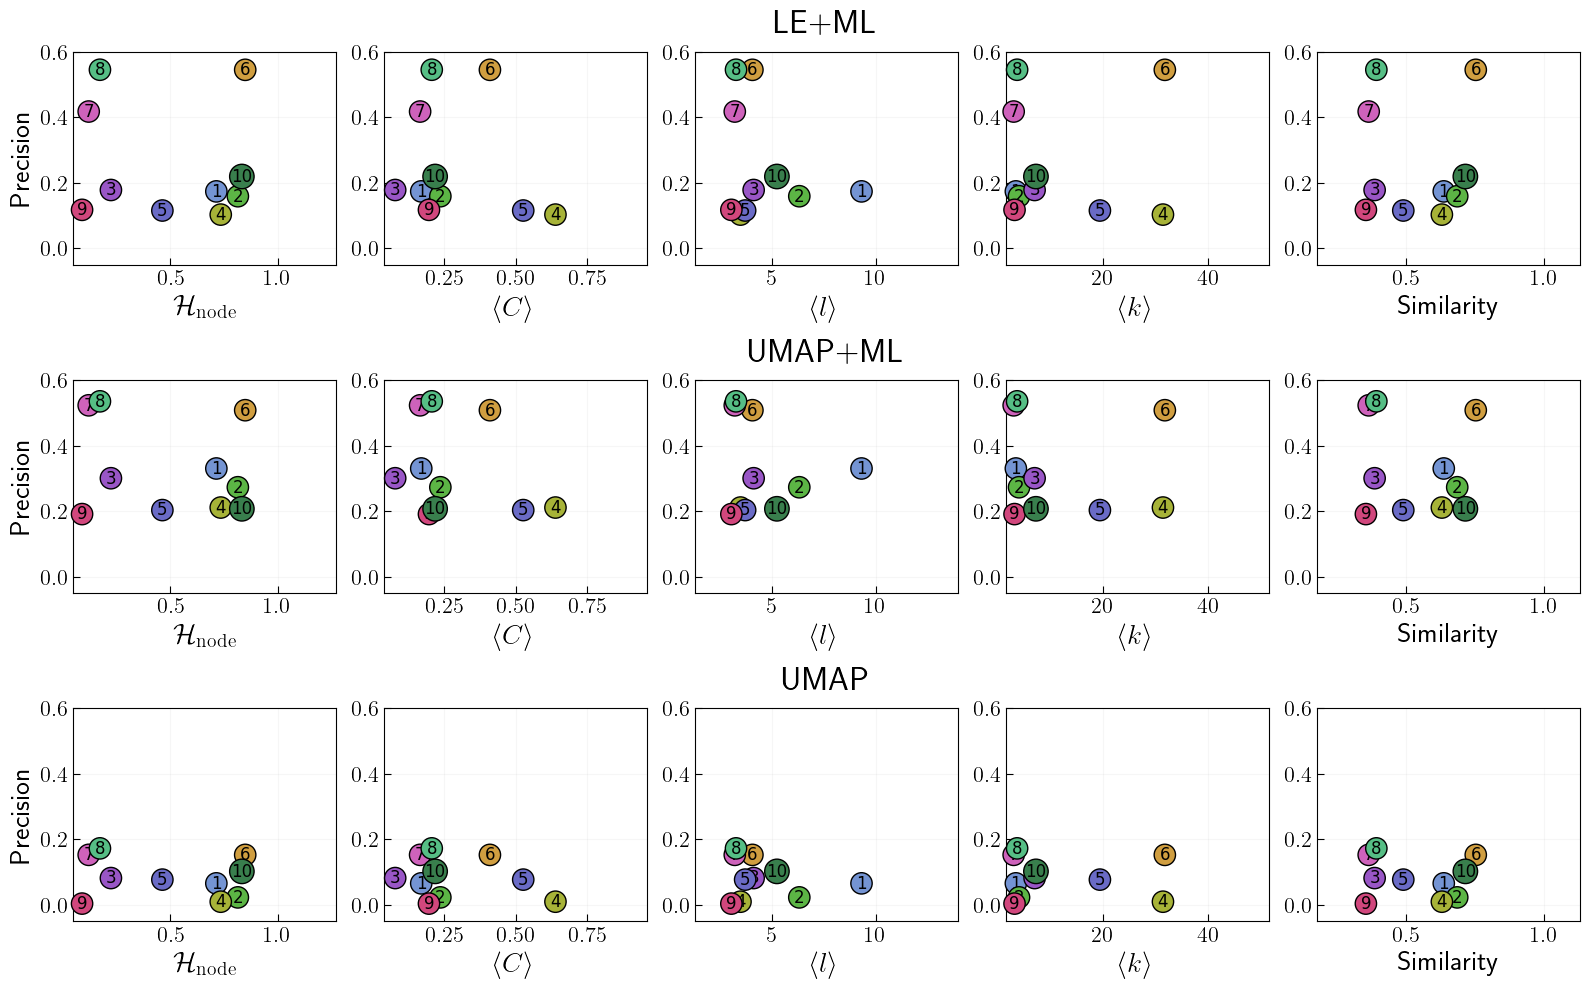

time: 3 s (started: 2023-12-11 12:06:48 +01:00)


In [14]:
pr_le_ml = np.array([
    citeseer_pr['pr_le_ml'],
    cora_pr['pr_le_ml'],
#     film_pr['pr_le_ml'],
    dblp_pr['pr_le_ml'],
    imdb_pr['pr_le_ml'],
    amazon_photo_pr['pr_le_ml'],
    cornell_pr['pr_le_ml'],
    wisconsin_pr['pr_le_ml'],
    texas_pr['pr_le_ml'],
    lastfm_pr['pr_le_ml'],
    twitch_ptbr_pr['pr_le_ml'],
])

pr_umap_ml = np.array([
    citeseer_pr['pr_umap_ml'],
    cora_pr['pr_umap_ml'],
#     film_pr['pr_umap_ml'],
    dblp_pr['pr_umap_ml'],
    imdb_pr['pr_umap_ml'],
    amazon_photo_pr['pr_umap_ml'],
    cornell_pr['pr_umap_ml'],
    wisconsin_pr['pr_umap_ml'],
    texas_pr['pr_umap_ml'],
    lastfm_pr['pr_umap_ml'],
    twitch_ptbr_pr['pr_umap_ml'],
])

pr_only_umap = np.array([
    citeseer_pr['pr_only_umap'],
    cora_pr['pr_only_umap'],
#     film_pr['pr_only_umap'],
    dblp_pr['pr_only_umap'],
    imdb_pr['pr_only_umap'],
    amazon_photo_pr['pr_only_umap'],
    cornell_pr['pr_only_umap'],
    wisconsin_pr['pr_only_umap'],
    texas_pr['pr_only_umap'],
    lastfm_pr['pr_only_umap'],
    twitch_ptbr_pr['pr_only_umap'],
])

def plot_pr_per_option(pr_res, col):
    datasets = list(range(1, 15))
    for gr, h, c, name in zip(pr_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 0.6)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_cc_all_options_per_type(pr_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_pr_per_option(pr_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Precision')

    plt.subplot(3, 5, i+1)
    plot_pr_per_option(pr_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_pr_per_option(pr_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_pr_per_option(pr_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_pr_per_option(pr_res, 'similarity')
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_cc_all_options_per_type(pr_le_ml, 'LE+ML', i=1)
plot_cc_all_options_per_type(pr_umap_ml, 'UMAP+ML', i=6)
plot_cc_all_options_per_type(pr_only_umap, 'UMAP', i=11)
plt.tight_layout()


Text(0.5, 1.03, '1 $\\times$ ML')

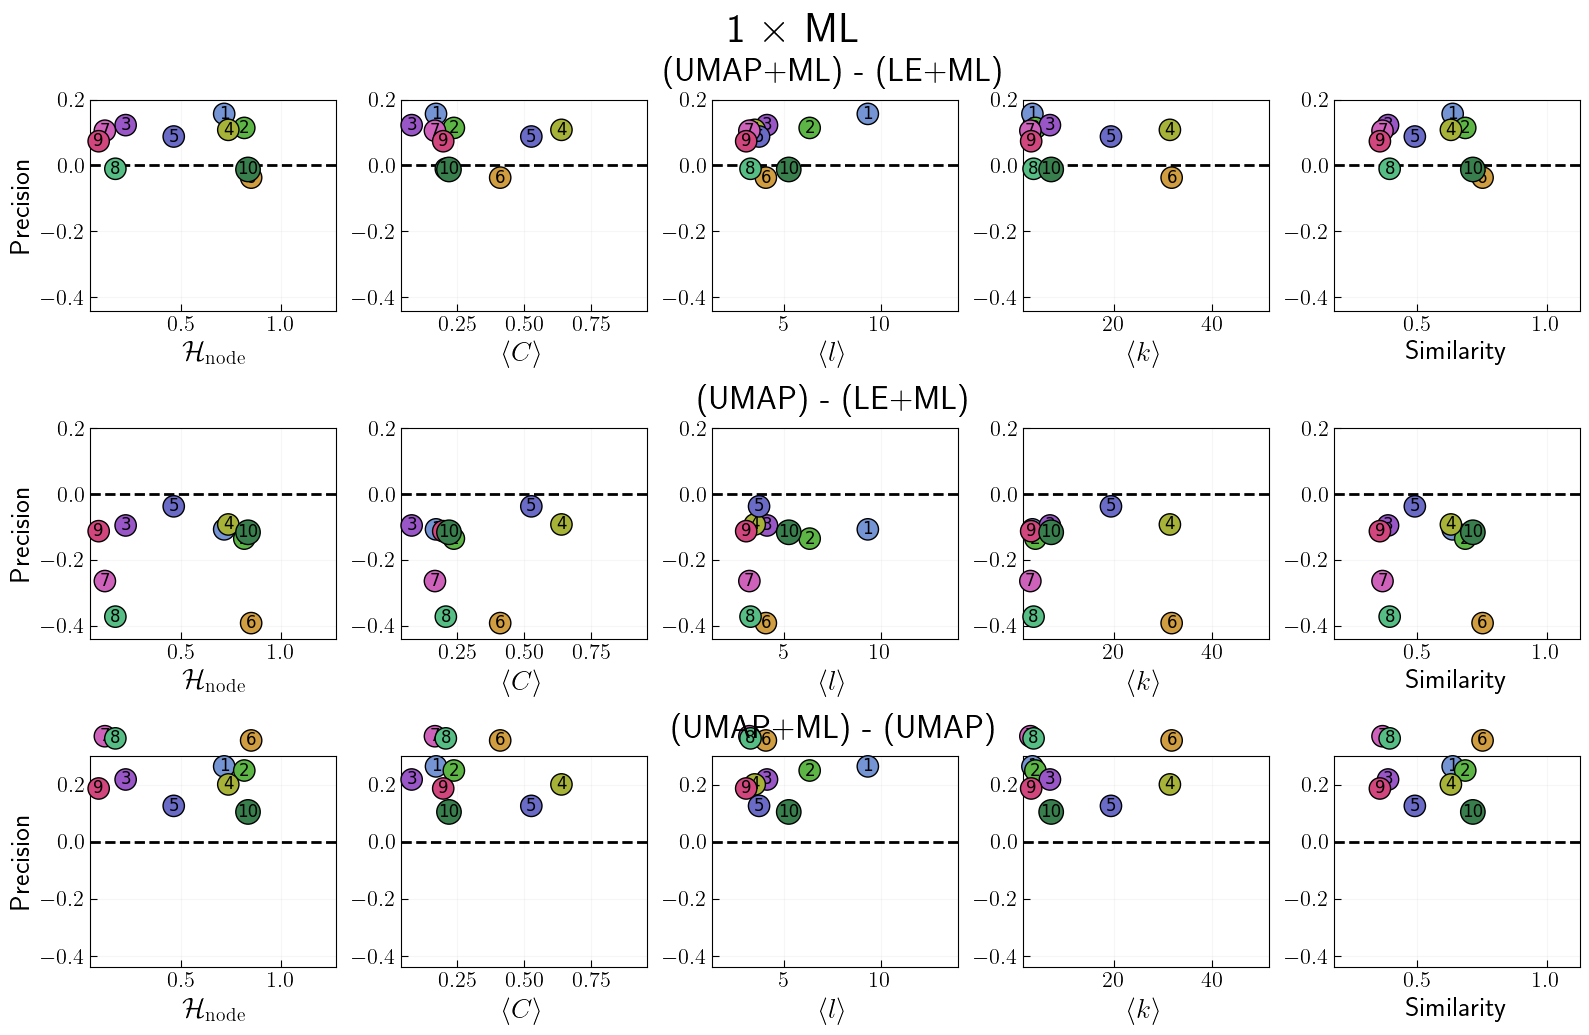

time: 1.57 s (started: 2023-05-11 10:29:24 +02:00)


In [30]:
def plot_pr_all_options_difference(pr_res, title, ymin=-0.44, ymax=0.2, i=1):
    plt.subplot(3, 5, i)
    plot_pr_per_option(pr_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Precision')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_pr_per_option(pr_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_pr_per_option(pr_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_pr_per_option(pr_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_pr_per_option(pr_res, 'similarity')
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_pr_all_options_difference(pr_umap_ml - pr_le_ml, title='(UMAP+ML) - (LE+ML)', i=1)
plot_pr_all_options_difference(pr_only_umap - pr_le_ml, title='(UMAP) - (LE+ML)', i=6)
plot_pr_all_options_difference(pr_umap_ml - pr_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymax=0.3)
plt.tight_layout()


plt.suptitle(r"1 $\times$ ML", y=1.03, fontsize=30)
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/node-classification-labels-cC-link-prediction-17-04-23/plots/link_prediction_precision_0_1_fraction_1ML.pdf")

In [7]:
import pickle

# UMAP labels + c_C
with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_umap_labels_cC_train_0_8.dat", 'rb') as f:
    nc_umap_labels_le_ml = pickle.load(f)

with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_umap_labels_cC_train_0_8.dat", 'rb') as f:
    nc_umap_labels_umap_ml = pickle.load(f)

with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_umap_labels_cC_train_0_8.dat", 'rb') as f:
    nc_umap_labels_only_umap = pickle.load(f)   

nc_umap_labels = [nc_umap_labels_le_ml, nc_umap_labels_umap_ml, nc_umap_labels_only_umap]

time: 3.69 ms (started: 2023-12-11 12:06:00 +01:00)


Text(0.5, 0, '$\\Delta$ Accuracy (Features) in NC')

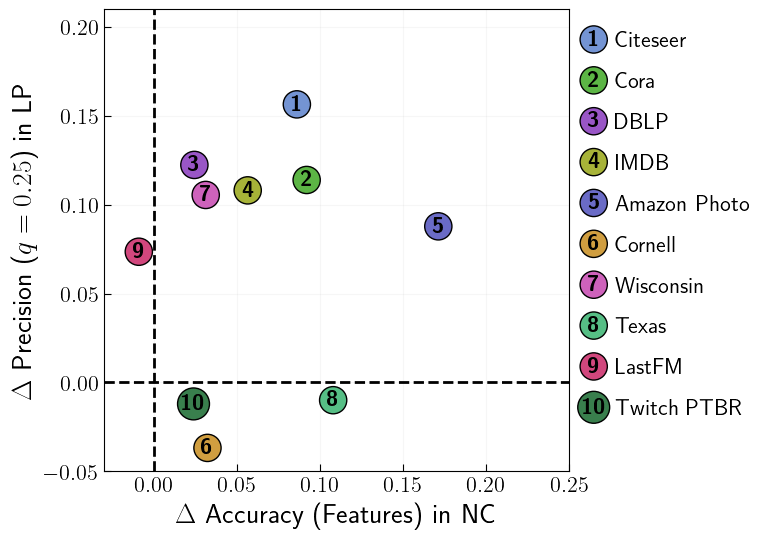

time: 301 ms (started: 2023-12-11 12:08:42 +01:00)


In [19]:
from matplotlib.lines import Line2D

plt.figure(figsize=(6, 6))
xs = np.mean(nc_umap_labels_umap_ml, axis=1) - np.mean(nc_umap_labels_le_ml, axis=1)
ys = pr_umap_ml - pr_le_ml

i = 1
datasets = ['Citeseer', 'Cora', 'DBLP', 'IMDB', 'Amazon Photo',
            'Cornell', 'Wisconsin', 'Texas', 'LastFM', 'Twitch PTBR']

for x, y, c, d in zip(xs, ys, colors, datasets):
    if d == 'Film':
        continue
    plt.text(x, y, r'\textbf{' + str(i) + r'}', ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.17", fc=c), fontsize=16, usetex=True)
    i += 1

plt.ylim(-0.05, 0.21)
plt.xlim(-0.03, 0.25)

# Plot legend
datasets = ['Citeseer', 'Cora', 'DBLP', 'IMDB', 'Amazon Photo',
            'Cornell', 'Wisconsin', 'Texas', 'LastFM', 'Twitch PTBR']

y = 0.193
i = 1
for c, d in zip(colors, datasets):
    if d == 'Film':
        continue
    plt.text(0.265, y, r'\textbf{' + str(i) + r'}', ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.17", fc=c), fontsize=16, usetex=True)
    plt.text(0.278, y-0.004, d, ha="left", fontsize=16, usetex=True)
    y -= 0.023
    i += 1

plt.axvline(linewidth=2, linestyle='--', color='black')
plt.axhline(linewidth=2, linestyle='--', color='black')

plt.ylabel(r'$\Delta$ Precision ($q=0.25$) in LP')
plt.xlabel(r'$\Delta$ Accuracy (Features) in NC')

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/node-classification-link-prediction-with-random-case-21-04-23/plots/precision_improvement_accuracy_improvement_1ML.pdf")
# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/figures-publication-and-random-initialization-27-04-23/plots/precision_improvement_accuracy_improvement_1ML.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/figures-publication-and-random-initialization-27-04-23/plots/precision_improvement_accuracy_improvement_1ML_train_0_8.pdf")
